# Kenya Agricultural Market Insights and Forecasting System with Sentiment Analysis Project

## BUSINESS UNDERSTANDING

### Business Overview
Economic and livelihood concerns are critical issues in Kenya, impacting a substantial portion of the population. The agricultural sector, which is a major contributor to Kenya's economy, faces numerous challenges, including price volatility, market inefficiencies, and fluctuating public sentiment. These issues directly affect farmers' and traders' livelihoods, making it essential to develop data-driven solutions to address these concerns.


##### Stakeholders and Their Gains
1. Farmers (Small-Scale & Large-Scale)

🔹 Gains:

- Informed decisions on when and where to sell their produce for maximum profit.
- Insights into seasonal price trends to optimize crop production cycles.
- Awareness of public sentiment that may impact market demand.

2. Traders & Distributors (Wholesalers & Retailers)

🔹 Gains:

- Forecasting tools to plan optimal buying and selling times.
- Reduction in losses due to unexpected price drops.
- Better logistics planning by analyzing regional price variations.

3. Policymakers & Government Agencies (Ministry of Agriculture, KNBS, NDMA, etc.)

🔹 Gains:

- Data-backed policy formulation for price stabilization and market interventions.
- Early warning systems for food security and drought preparedness.
- Understanding of market inefficiencies to improve agricultural policies.

4. Financial Institutions & Investors (Banks, Microfinance Institutions, Agribusiness Investors)

🔹 Gains:

- Credit risk assessment based on market trends and price stability.
- Informed decisions on investing in agriculture-related ventures.
- Development of agricultural insurance products based on price volatility analysis.

5. Consumers (General Public)

🔹 Gains:

- Awareness of expected price changes for household budgeting.
- More stable prices due to better market efficiency.
- Potential for lower food costs as market inefficiencies decrease.

6. Researchers & Data Scientists

🔹 Gains:

- A valuable dataset for further analysis and model improvements.
- Opportunities to develop new methodologies for price forecasting and sentiment analysis.
- Enhanced understanding of the relationship between social sentiment and economic trends.

### Problem Statement
Kenya's agricultural markets are characterized by significant price fluctuations across different regions and commodities. Factors such as seasonal variations, market demand, and public perception contribute to these fluctuations. For instance, maize prices can vary dramatically based on the time of year and the region, impacting farmers' decisions on when and where to sell their produce. Additionally, public sentiment, as expressed on social media platforms like Twitter, can influence market dynamics, further complicating the decision-making process for stakeholders.


### Main Objective
Develop a comprehensive system that leverages advanced data science techniques to analyze and forecast commodity prices, monitor market trends, and incorporate sentiment analysis. This system aims to provide actionable insights to farmers, traders, and policymakers, enabling informed decisions and improving market efficiency and stability. Time series forecasting will be achieved through graphical analysis. Regression analysis and sentiment analysis will play critical roles in predicting commodity prices and understanding public sentiment, respectively, thereby enhancing the overall accuracy and relevance of market predictions.


### Specific Objectives
1.	Assess Commodity Price Fluctuations

- Evaluate the price volatility of various commodities across different regions and time periods
- Identify the factors contributing to price fluctuations, such as seasonal variations, market demand, and public sentim

2.	Analyze Market Trends:
   
- Monitor market trend s and patterns in commodity prices using historical data and advanced analytics.
- Develop predictive models to forecast future market trends and price movements ent

3.	Incorporate Sentiment Analysis:

- Leverage sentiment analysis on social media data, particularly from Twitter, to assess public perception of agricultural markets. 
- Develop machine learning models to quantify the relationship between sentiment trends and commodity price fluctuations, enabling more accurate market predictions.

### Success Metrics

#### Forecasting Model Accuracy (Commodity Price Prediction)

| Metric | Target Range | Ideal Goal | Comments                                      |
|--------|--------------|------------|-----------------------------------------------|
| MAE    | 5–20 KES     | < 10 KES   | Lower values indicate better predictions.     |
| RMSE   | 10–30 KES    | < 15 KES   | Penalizes large errors more than MAE.         |
| R²     | 0.70–0.95    | > 0.85     | Higher values mean better model fit.          |

*Ideal Target:* MAE < 10 KES, RMSE < 15 KES, R² > 0.85  
(If commodity prices vary widely, normalize error metrics based on average price ranges.)

#### Sentiment Analysis Performance

| Metric    | Target Range | Ideal Goal | Comments                                                  |
|-----------|--------------|------------|-----------------------------------------------------------|
| Precision | 70–95%       | > 85%      | Measures how many positive sentiment predictions were correct. |
| Recall    | 65–90%       | > 80%      | Measures how well the model captures all positive sentiments.  |
| F1-Score  | 75–90%       | > 85%      | Balances precision and recall.                             |

*Ideal Target:* F1-Score > 85%, Precision & Recall > 80%

## Data understanding


The data used in this project originates from various sources, including historical commodity prices, geographical information, and sentiment data from social media platforms.

1. The primary dataset contains Food Prices data for Kenya, sourced from the Kenya Agricultural Market Information System [KAMIS](https://kamis.kilimo.go.ke/site/market?product=153&per_page=10), developed by the Ministry of Agriculture, Livestock, Fisheries, and Cooperatives. This database covers foods such as maize, rice, beans, fish, and sugar,is updated weekly(though mostly contains monthly data). The platform offers data on commodity prices, trade volumes, and market highlights

2. Geographical Information:

-	Data on the location and characteristics of different agricultural markets in Kenya.
-	Includes information on regional variations in market conditions and infrastructure.

3. Sentiment Data from Social Media:
    
- Data collected from social media platforms like Twitter, capturing public sentiment related to agricultural markets.
- Includes information on public perception, opinions,  and discussions about commodity prices and market dynamics.




## Understanding rows and columns of our data

In [88]:
#importing necessary libraries
import pandas as pd
import glob
import os
#from geopy.geocoders import Nominatim
import warnings
import time
import sys
import matplotlib.pyplot as plt


# importing custom scripts for different functions
sys.path.append('scripts')  # add scripts to path
from visualization import *
#from geolocate import geolocate_markets
#from scrape_kamis import scrape_kamis


# Ignore warnings
warnings.filterwarnings("ignore")

In [89]:
#load the data
wfpdata = pd.read_csv('Data\wfp_food_prices_ken.csv')
wfpdata.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,15/01/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235
2,15/01/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480,20.5041
3,15/01/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659
4,15/01/2006,Coast,Mombasa,Mombasa,-4.05,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246,44.9705


In [90]:
#getting an overview and summary of dataframe
wfpdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12865 entries, 0 to 12864
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       12865 non-null  object
 1   admin1     12825 non-null  object
 2   admin2     12825 non-null  object
 3   market     12865 non-null  object
 4   latitude   12825 non-null  object
 5   longitude  12825 non-null  object
 6   category   12865 non-null  object
 7   commodity  12865 non-null  object
 8   unit       12865 non-null  object
 9   priceflag  12865 non-null  object
 10  pricetype  12865 non-null  object
 11  currency   12865 non-null  object
 12  price      12865 non-null  object
 13  usdprice   12865 non-null  object
dtypes: object(14)
memory usage: 1.4+ MB


From the above, it is found that the data has 12865 rows 14 columns of object datatype. 

In [91]:
#getting descriptive statistics of df
wfpdata.describe()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
count,12865,12825,12825,12865,12825,12825,12865,12865,12865,12865,12865,12865,12865,12865
unique,229,8,22,63,62,62,9,48,14,3,3,2,5768,9408
top,15/04/2021,Rift Valley,Turkana,Nairobi,-1.283333,36.816667,cereals and tubers,Maize (white),KG,actual,Retail,KES,10,0.091
freq,429,5352,2722,1108,1108,1108,5803,1303,5785,8002,6458,12864,312,21


The most common values in individual rows are displayed on the "top" column. Since all columns in the data are of object datatype, statistical information on the dataset cannot be displayed. 


In [92]:
# url = 'https://kamis.kilimo.go.ke/site/market?product=73&per_page=50000'
# scrape_kamis(url, 'Meat Beef.csv')


From the KAMIS website, were able to scrap data about different commodities as seperate excel files(CSV). The code below identifies all CSV files in the directory using glob, then iterates through each file, reading its contents -into individual Pandas DataFrames. These DataFrames are stored in a list and later concatenated into a single DataFrame (combined_df).


In [93]:
# Set the directory containing your CSV files
csv_directory = ".\\Data\\Products"  # Replace with the path to your directory

# Use glob to match all CSV files in the directory
csv_files = glob.glob(os.path.join(csv_directory, '*.csv'))

# Initialize an empty list to hold DataFrames
data_frames = []

# Iterate over the list of CSV files
for file in csv_files:
    # Read each CSV file into a DataFrame
    df = pd.read_csv(file)
    # Append the DataFrame to the list
    data_frames.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(data_frames, ignore_index=True)

# printing part of the combined dataframe
combined_df

,Commodity,Classification,Grade,Sex,Market,Wholesale,Retail,Supply Volume,County,Date
0,Meat Beef,-,-,-,Mbale,-,600.00/Kg,1200.0,Vihiga,2025-02-11
1,Meat Beef,-,-,-,Mbale,550.00/Kg,600.00/Kg,2000.0,Vihiga,2025-02-06
2,Meat Beef,-,-,-,Mbale,500.00/Kg,600.00/Kg,2000.0,Vihiga,2025-01-31
3,Meat Beef,-,-,-,Mbale,-,700.00/Kg,900.0,Vihiga,2025-01-28
4,Meat Beef,-,-,-,Mbale,-,500.00/Kg,700.0,Vihiga,2025-01-22
...,...,...,...,...,...,...,...,...,...,...
288473,Beans (Yellow-Green),-,-,-,Gikomba,-,150.00/Kg,NaN,Nairobi,2021-05-24
288474,Beans (Yellow-Green),-,-,-,Eldama Ravine,100.00/Kg,120.00/Kg,300.0,Baringo,2021-05-24
288475,Beans (Yellow-Green),-,-,-,Kongowea,95.56/Kg,110.00/Kg,900.0,Mombasa,2021-05-24
288476,Beans (Yellow-Green),-,-,-,Makutano West Pokot,140.00/Kg,200.00/Kg,NaN,West-Pokot,2021-05-24


The combined dataframe encompanses different variety of foods over different markets in Kenya alongside their prices over a period of time. Their supply volume is also indicated. Combined, the dataframe spans 288478 rows and 10 columns. 

In [94]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288478 entries, 0 to 288477
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Commodity       288478 non-null  object 
 1   Classification  288478 non-null  object 
 2   Grade           288478 non-null  object 
 3   Sex             288478 non-null  object 
 4   Market          288478 non-null  object 
 5   Wholesale       288478 non-null  object 
 6   Retail          288478 non-null  object 
 7   Supply Volume   175498 non-null  float64
 8   County          287917 non-null  object 
 9   Date            288478 non-null  object 
dtypes: float64(1), object(9)
memory usage: 22.0+ MB


The dataset contains 288,478 records and 10 columns. 9 columns contain text (object) datatype, 1 column (Supply Volume) contains numeric (float64) datatype. Supply Volume: Only 175,498 out of 288,478 rows have values. County: Almost complete, but 561 records have missing values. Other columns are fully populated, but some might contain placeholder values.

In [95]:
combined_df.describe()

,Supply Volume
count,1.754980e+05
mean,7.809961e+03
std,4.115118e+05
min,0.000000e+00
25%,5.000000e+02
50%,1.500000e+03
75%,4.300000e+03
max,1.000000e+08


The above indicates statistical description of the Supply Volume column in the dataset, since it is the only numerical column. 

## DATA CLEANING

In data cleaning, we will ensure the dataset is accurate, relevant, consistent, complete, and uniform. This involves verifying data points against trusted sources, removing inaccuracies and outliers, filtering out irrelevant information that does not help in our analysis. We will also address inconsistent data formats, check naming conventions, ensuring a uniform structure across datasets, as well as identifying and filling null values to achieve completeness.
These steps are vital in maintaining data quality.

In [96]:
# Find latitudes and longitudes for markets
# geolocate_markets(combined_df)


The Geopy library was used to convert market names into coordinates while ensuring all locations are within Kenya. To optimize performance, it stores previously searched locations in a cache to avoid redundant API calls. The script iterates through the dataset, processes each market, and adds the coordinates to new columns in the DataFrame. Finally, it saves the updated data to a CSV file named "combined_with_coordinates.csv" for further analysis.

In [97]:
# Loading the new combined dataset with coordinates
products_df = pd.read_csv('.\\Data\\combined_with_coordinates.csv')

In [98]:
# Looking at the data's info
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288478 entries, 0 to 288477
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Commodity       288478 non-null  object 
 1   Classification  288478 non-null  object 
 2   Grade           288478 non-null  object 
 3   Sex             288478 non-null  object 
 4   Market          288478 non-null  object 
 5   Wholesale       288478 non-null  object 
 6   Retail          288478 non-null  object 
 7   Supply Volume   175498 non-null  float64
 8   County          287917 non-null  object 
 9   Date            288478 non-null  object 
 10  latitude        199401 non-null  float64
 11  longitude       199401 non-null  float64
dtypes: float64(3), object(9)
memory usage: 26.4+ MB


From the above, there are 12 rows and 288478 columns, with some columns having missing values. All columns are of object datatype except the longitude, latitude, and supply volume.

In [99]:
# Finding statistical description of numerical columns in the dataset
products_df.describe()

,Supply Volume,latitude,longitude
count,1.754980e+05,199401.000000,199401.000000
mean,7.809961e+03,-0.686573,36.237790
std,4.115118e+05,1.435692,1.794955
min,0.000000e+00,-4.622956,34.138607
25%,5.000000e+02,-1.166037,34.763182
50%,1.500000e+03,-0.274214,35.834422
75%,4.300000e+03,0.129513,37.250000
max,1.000000e+08,3.709823,55.454533


A commodity category mapping should be created to classify different commodities into broader food categories like vegetables and fruits, cereals and tubers, pulses and nuts, meat, fish and eggs, and milk and dairy. The mapping ensures consistency when analyzing or visualizing data. Using the .map() function, each commodity in the products_df DataFrame is assigned its respective category based on the dictionary. This step is crucial for easier aggregation, comparison, and trend analysis of different commodity groups in the dataset.

In [100]:
# Finding unique classifications on the products dataframe
products_df['Classification'].unique()

array(['-', 'White Maize', 'Mixed-Traditional', 'Yellow Maize', 'IRR',
       'Dola', 'Jembe', 'Hostess', 'Equatorial afya ugali', 'Ajab',
       'Amaize', '210(two ten)', 'Ugali Afya', 'Taifa', 'Soko',
       'Raha Premium', 'Pembe', 'Oryx', 'Ndovu', 'Mama', 'Jogoo wimbi',
       'Jogoo', 'Tajiri maize meal', 'Kifaru', 'Cosmo', 'Shujaa',
       'Posho Mill', 'Jimbi', 'Unga afya', 'Canna', 'Jamii',
       'Organic (cassava, sorghum &maize)', 'Twiga',
       'Organic (maize&cassava flour)',
       'Organic ( millet, sorghum & maize flour )', 'Kiki maize meal',
       'Supreme', 'Dried', 'Fried', 'Fresh', 'Fillet', 'Sindano',
       'Pishori'], dtype=object)

In [101]:
# Commodity categories mapping
commodity_category_mapping = {
    'Meat Beef': 'meat, fish and eggs',
    'Cabbages': 'vegetables and fruits',
    'Banana (Cooking)': 'vegetables and fruits',
    'Cowpea leaves (Kunde)': 'vegetables and fruits',
    'Cowpeas': 'pulses and nuts',
    'Dry Onions': 'vegetables and fruits',
    'Dry Maize': 'cereals and tubers',
    'Finger Millet': 'cereals and tubers',
    'Maize Flour': 'cereals and tubers',
    'Kales/Sukuma Wiki': 'vegetables and fruits',
    'Omena': 'meat, fish and eggs',
    'Red Irish potato': 'cereals and tubers',
    'Cow Milk(Processd)': 'milk and dairy',
    'Beans Red Haricot (Wairimu)': 'pulses and nuts',
    'Red Sorghum': 'cereals and tubers',
    'Rice': 'cereals and tubers',
    'Banana (Ripening)': 'vegetables and fruits',
    'Spinach': 'vegetables and fruits',
    'Wheat': 'cereals and tubers',
    'Beans (Yellow-Green)': 'pulses and nuts'
}
# Map commodities to categories
products_df['Category'] = products_df['Commodity'].map(commodity_category_mapping)

# Display the updated DataFrame
products_df.head()

,Commodity,Classification,Grade,Sex,Market,Wholesale,Retail,Supply Volume,County,Date,latitude,longitude,Category
0,Meat Beef,-,-,-,Mbale,-,600.00/Kg,1200.0,Vihiga,2025-02-11,0.083501,34.720326,"meat, fish and eggs"
1,Meat Beef,-,-,-,Mbale,550.00/Kg,600.00/Kg,2000.0,Vihiga,2025-02-06,0.083501,34.720326,"meat, fish and eggs"
2,Meat Beef,-,-,-,Mbale,500.00/Kg,600.00/Kg,2000.0,Vihiga,2025-01-31,0.083501,34.720326,"meat, fish and eggs"
3,Meat Beef,-,-,-,Mbale,-,700.00/Kg,900.0,Vihiga,2025-01-28,0.083501,34.720326,"meat, fish and eggs"
4,Meat Beef,-,-,-,Mbale,-,500.00/Kg,700.0,Vihiga,2025-01-22,0.083501,34.720326,"meat, fish and eggs"


From analysis, the 'Sex' amd 'Grade' column are not necessary for our assessment, and hence should be dropped

In [102]:
products_df.drop(columns= ['Sex','Grade'], inplace=True,axis=1)

In [103]:
# Confirming they have been dropped
products_df.head()

,Commodity,Classification,Market,Wholesale,Retail,Supply Volume,County,Date,latitude,longitude,Category
0,Meat Beef,-,Mbale,-,600.00/Kg,1200.0,Vihiga,2025-02-11,0.083501,34.720326,"meat, fish and eggs"
1,Meat Beef,-,Mbale,550.00/Kg,600.00/Kg,2000.0,Vihiga,2025-02-06,0.083501,34.720326,"meat, fish and eggs"
2,Meat Beef,-,Mbale,500.00/Kg,600.00/Kg,2000.0,Vihiga,2025-01-31,0.083501,34.720326,"meat, fish and eggs"
3,Meat Beef,-,Mbale,-,700.00/Kg,900.0,Vihiga,2025-01-28,0.083501,34.720326,"meat, fish and eggs"
4,Meat Beef,-,Mbale,-,500.00/Kg,700.0,Vihiga,2025-01-22,0.083501,34.720326,"meat, fish and eggs"


In [104]:
#Handling missing values
#Checking for nulls
nan_percent = (products_df.isna().sum() / len(products_df))*100 # total percent of missing values per column
print("percentage of nulls","\n", nan_percent)

percentage of nulls 
 Commodity          0.000000
Classification     0.000000
Market             0.000000
Wholesale          0.000000
Retail             0.000000
Supply Volume     39.164165
County             0.194469
Date               0.000000
latitude          30.878265
longitude         30.878265
Category           0.000000
dtype: float64


Checked for any missing values in the Products dataset and found 4 columns had mising values. They include: Supply volume - 39%, Latitude and Longitude at 31% each and County had 0.2%.

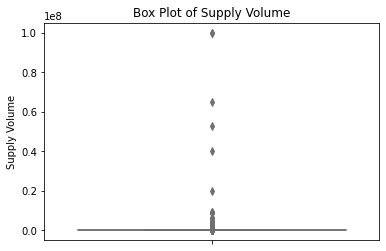

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(y=products_df['Supply Volume'], color='skyblue').set(title='Box Plot of Supply Volume', ylabel='Supply Volume')
plt.show();

Since Supply Volume column has the highest count of missing values, we decided to investigate its distribution using a boxplot since its numerical. The boxplot indicates that the distribution is skewed and we decided to impute the missing values with the median.

Before that, we want to identify those extreme outliers in the column with figures greater than 100,000 and drop them.

In [106]:
# finding the number of outliers in the supply volume column
supply_count=products_df['Supply Volume'] > 1e+05
supply_count.value_counts()

False    287946
True        532
Name: Supply Volume, dtype: int64

In [107]:
# drop outliers
products_df.drop(products_df[products_df['Supply Volume'] > 1e+05].index, inplace=True)

In [108]:
# confirming outliers have been dropped
supply_count1=products_df['Supply Volume'] > 1e+05
supply_count1.value_counts()

False    287946
Name: Supply Volume, dtype: int64

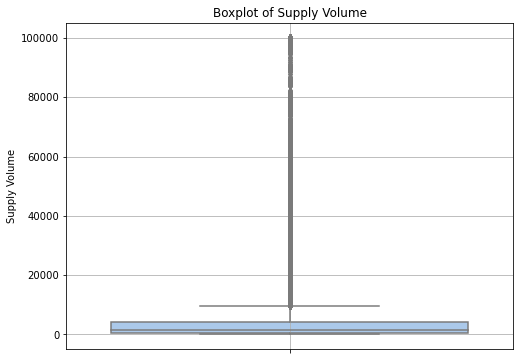

In [109]:
# Plotting boxplot of supply volume 
plot_boxplot(products_df, 'Supply Volume')


Having confirmed that the extreme outliers have been dropped, let's proceed with imputation. It is therefore important to calculate the median of each commodity then impute them. To ensure the median for each commodity is different, they have been printed out below:

In [110]:
# Compute median values for each commodity
supply_medians = products_df.groupby('Commodity')[['Supply Volume']].median()

# Print median values before imputing
print(supply_medians)

# Function to impute missing values with median
def impute_supply_median(row):
    if pd.isna(row['Supply Volume']):
        row['Supply Volume'] = supply_medians.loc[row['Commodity'], 'Supply Volume']
    return row

# Apply imputation
products_df = products_df.apply(impute_supply_median, axis=1)


                             Supply Volume
Commodity                                 
Banana (Cooking)                       NaN
Banana (Ripening)                      NaN
Beans (Yellow-Green)                1000.0
Beans Red Haricot (Wairimu)          900.0
Cabbages                            3600.0
Cow Milk(Processd)                   840.0
Cowpea leaves (Kunde)                400.0
Cowpeas                              720.0
Dry Maize                           4500.0
Dry Onions                          2440.0
Finger Millet                        720.0
Kales/Sukuma Wiki                   1000.0
Maize Flour                         2880.0
Meat Beef                           1000.0
Omena                               1000.0
Red Irish potato                    3500.0
Red Sorghum                          800.0
Rice                                2000.0
Spinach                              500.0
Wheat                                900.0


In [111]:
# print the new null percentages for each column
nan_percent = (products_df.isna().sum() / len(products_df))*100 # total percent of missing values per column
print("percentage of nulls","\n", nan_percent)

percentage of nulls 
 Commodity          0.000000
Classification     0.000000
Market             0.000000
Wholesale          0.000000
Retail             0.000000
Supply Volume      2.264313
County             0.193439
Date               0.000000
latitude          30.917255
longitude         30.917255
Category           0.000000
dtype: float64


Checked for missing values again and confimed that the supply volume column now had none. The remaining column with nulls are Latitude and Longitude at 31% each and County had 0.2%.

Longitude and Latitude columns contain geographical data and there is no way to impute those missing values. County column has 0.2% nulls which is a neglible amount.

We decided to drop all the remaining observations with nulls since there was no risk of lossing a lot of data.

In [112]:
#drop remaining records with nulls
products_df=products_df.dropna(axis=0).reset_index()

In [113]:
# check for missing percentages again
nan_percent = (products_df.isna().sum() / len(products_df))*100 # total percent of missing values per column
print("percentage of nulls","\n", nan_percent)

products_df.info()

percentage of nulls 
 index             0.0
Commodity         0.0
Classification    0.0
Market            0.0
Wholesale         0.0
Retail            0.0
Supply Volume     0.0
County            0.0
Date              0.0
latitude          0.0
longitude         0.0
Category          0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195172 entries, 0 to 195171
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   index           195172 non-null  int64  
 1   Commodity       195172 non-null  object 
 2   Classification  195172 non-null  object 
 3   Market          195172 non-null  object 
 4   Wholesale       195172 non-null  object 
 5   Retail          195172 non-null  object 
 6   Supply Volume   195172 non-null  float64
 7   County          195172 non-null  object 
 8   Date            195172 non-null  object 
 9   latitude        195172 non-null  float64
 10  longitude       195172 non-null

The dataframe now has no missing values and contains 195172 rows with 14 columns.

In [114]:
#Check for duplicates
products_df.duplicated().value_counts()

False    195172
dtype: int64

Checked for any duplicated records on the dataset and found None.

Next thing to be done is to change the 'Date' column into date-time format for easier analysis of trends. 

In [115]:
# Changing Date column into date time format
products_df['Date'] = pd.to_datetime(products_df['Date'])
# Checking to ensure changes have reflected
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195172 entries, 0 to 195171
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   index           195172 non-null  int64         
 1   Commodity       195172 non-null  object        
 2   Classification  195172 non-null  object        
 3   Market          195172 non-null  object        
 4   Wholesale       195172 non-null  object        
 5   Retail          195172 non-null  object        
 6   Supply Volume   195172 non-null  float64       
 7   County          195172 non-null  object        
 8   Date            195172 non-null  datetime64[ns]
 9   latitude        195172 non-null  float64       
 10  longitude       195172 non-null  float64       
 11  Category        195172 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 17.9+ MB


We are supposed to change the retail and wholesale prices into float values. However, each is attached to a unit of measurement, for example, maize measured in kilograms and milk measured in litres. The units will be seperated from the prices, added to another column, and the prices converted to float64 format. 

In [116]:
# Extract the numeric values and units
products_df['Unit'] = products_df['Retail'].str.extract(r'([a-zA-Z/-]+)')  # Extract unit
products_df['Retail'] = products_df['Retail'].str.extract(r'([\d.]+)').astype(float)  # Extract number

products_df['Wholesale'] = products_df['Wholesale'].str.extract(r'([\d.]+)').astype(float)  # Extract number

In [117]:
# Checking if changes have been effected
products_df.head()

,index,Commodity,Classification,Market,Wholesale,Retail,Supply Volume,County,Date,latitude,longitude,Category,Unit
0,0,Meat Beef,-,Mbale,NaN,600.0,1200.0,Vihiga,2025-02-11,0.083501,34.720326,"meat, fish and eggs",/Kg
1,1,Meat Beef,-,Mbale,550.0,600.0,2000.0,Vihiga,2025-02-06,0.083501,34.720326,"meat, fish and eggs",/Kg
2,2,Meat Beef,-,Mbale,500.0,600.0,2000.0,Vihiga,2025-01-31,0.083501,34.720326,"meat, fish and eggs",/Kg
3,3,Meat Beef,-,Mbale,NaN,700.0,900.0,Vihiga,2025-01-28,0.083501,34.720326,"meat, fish and eggs",/Kg
4,4,Meat Beef,-,Mbale,NaN,500.0,700.0,Vihiga,2025-01-22,0.083501,34.720326,"meat, fish and eggs",/Kg


From the above, changes have been effected and units have been moved to a new column called 'Retail_units'

In [118]:
products_df.describe()

,index,Wholesale,Retail,Supply Volume,latitude,longitude
count,195172.000000,165742.000000,157772.000000,195172.000000,195172.000000,195172.000000
mean,145204.135573,82.767419,120.394456,3820.198176,-0.682051,36.239096
std,82163.782482,1289.685921,1090.267678,7616.095726,1.424611,1.789357
min,0.000000,0.010000,0.010000,0.000000,-4.622956,34.138607
25%,75998.750000,26.920000,50.000000,720.000000,-1.166037,34.763182
50%,148150.500000,50.000000,80.000000,2000.000000,-0.289173,35.834422
75%,214023.250000,88.000000,125.000000,3600.000000,0.129513,37.250000
max,288477.000000,480030.000000,411188.970000,100000.000000,3.709823,55.454533


In [119]:
# Checking if datatypes have been updated
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195172 entries, 0 to 195171
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   index           195172 non-null  int64         
 1   Commodity       195172 non-null  object        
 2   Classification  195172 non-null  object        
 3   Market          195172 non-null  object        
 4   Wholesale       165742 non-null  float64       
 5   Retail          157772 non-null  float64       
 6   Supply Volume   195172 non-null  float64       
 7   County          195172 non-null  object        
 8   Date            195172 non-null  datetime64[ns]
 9   latitude        195172 non-null  float64       
 10  longitude       195172 non-null  float64       
 11  Category        195172 non-null  object        
 12  Unit            195172 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memory usage: 19.4+ MB


All datatypes have been changed successfully. 

There are null values in the retail and wholesale columns of the data. 

In [120]:
# Finding the number of null values in the wholesale and retail columns of our data
null_counts = products_df.groupby('Commodity').apply(lambda x: x.isnull().sum())

print(null_counts[['Wholesale', 'Retail']])  # Adjust columns as needed

                             Wholesale  Retail
Commodity                                     
Beans (Yellow-Green)              1652     135
Beans Red Haricot (Wairimu)        258      50
Cabbages                          1693    4098
Cow Milk(Processd)                 510       7
Cowpea leaves (Kunde)             1256      30
Cowpeas                           1204    3587
Dry Maize                         1693    4349
Dry Onions                        1637    4166
Finger Millet                     1357    4156
Kales/Sukuma Wiki                 1626    3973
Maize Flour                       9931      17
Meat Beef                         2194      29
Omena                             1411      24
Red Irish potato                   814    8024
Red Sorghum                        215    3736
Rice                               550     109
Spinach                           1057      70
Wheat                              372     840


Since there is need to avoid loss of any more data, it is imparative that imputation is used. However each product has its distinct price and it would be inaccurate to impute the mean or mode of the whole column in the data series. Therefore, for missing values, the median of each commodity will be used to impute all the commodity's missing values

In [121]:
# Checking the number values in the dataset
print(products_df['Commodity'].value_counts())

Cabbages                       21274
Dry Maize                      20366
Dry Onions                     20121
Red Irish potato               18716
Kales/Sukuma Wiki              18045
Maize Flour                    12534
Finger Millet                  12364
Beans (Yellow-Green)           11348
Cowpeas                        10851
Spinach                         9653
Omena                           6762
Cowpea leaves (Kunde)           6539
Rice                            6231
Red Sorghum                     5868
Meat Beef                       5236
Beans Red Haricot (Wairimu)     3339
Wheat                           3216
Cow Milk(Processd)              2709
Name: Commodity, dtype: int64


It is therefore important to calculate the median of each commodity then impute them. To ensure the median for each commodity is different, they have been printed out below:

In [122]:
# Compute median values for each commodity
commodity_medians = products_df.groupby('Commodity')[['Retail', 'Wholesale']].median()

# Print median values before imputing
print(commodity_medians)

# Function to impute missing values with median
def impute_with_median(row):
    if pd.isna(row['Retail']):
        row['Retail'] = commodity_medians.loc[row['Commodity'], 'Retail']
    if pd.isna(row['Wholesale']):
        row['Wholesale'] = commodity_medians.loc[row['Commodity'], 'Wholesale']
    return row

# Apply imputation
products_df = products_df.apply(impute_with_median, axis=1)


                              Retail  Wholesale
Commodity                                      
Beans (Yellow-Green)         150.000     127.78
Beans Red Haricot (Wairimu)  100.000      80.00
Cabbages                      30.000      20.00
Cow Milk(Processd)           120.000     105.00
Cowpea leaves (Kunde)         55.000      38.00
Cowpeas                      130.000      80.00
Dry Maize                     60.000      38.89
Dry Onions                    92.310      60.00
Finger Millet                125.000      85.00
Kales/Sukuma Wiki             40.000      24.00
Maize Flour                   89.500      85.42
Meat Beef                    500.000     400.00
Omena                        308.805     200.00
Red Irish potato              50.000      30.00
Red Sorghum                   60.000      36.00
Rice                         125.000     100.00
Spinach                       50.000      35.00
Wheat                         90.000      55.56


After imputation, it is important to confirm that there are no more null values

In [123]:
# counting null values per commodity
null_counts = products_df.groupby('Commodity').apply(lambda x: x.isnull().sum())

print(null_counts[['Wholesale', 'Retail']])  # Adjust columns as needed

                             Wholesale  Retail
Commodity                                     
Beans (Yellow-Green)                 0       0
Beans Red Haricot (Wairimu)          0       0
Cabbages                             0       0
Cow Milk(Processd)                   0       0
Cowpea leaves (Kunde)                0       0
Cowpeas                              0       0
Dry Maize                            0       0
Dry Onions                           0       0
Finger Millet                        0       0
Kales/Sukuma Wiki                    0       0
Maize Flour                          0       0
Meat Beef                            0       0
Omena                                0       0
Red Irish potato                     0       0
Red Sorghum                          0       0
Rice                                 0       0
Spinach                              0       0
Wheat                                0       0


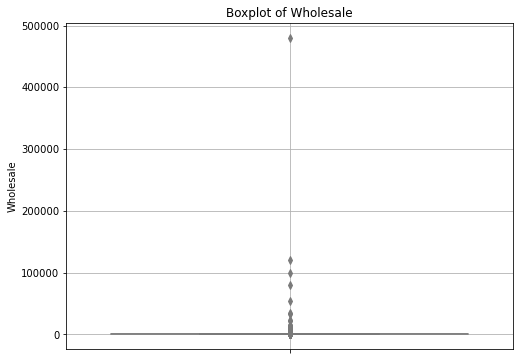

In [124]:
plot_boxplot(products_df, "Wholesale")

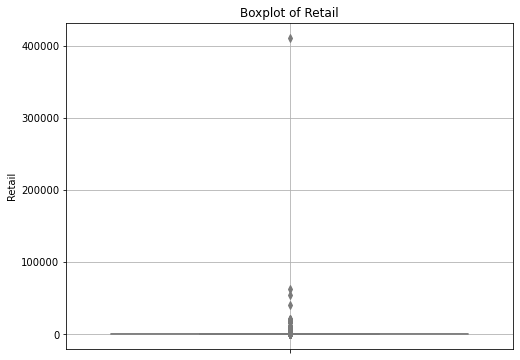

In [125]:
plot_boxplot(products_df, "Retail")

In [126]:
products_df = products_df[(products_df['Wholesale'] <= 1000) & (products_df['Wholesale'] >= 10)]
products_df = products_df[(products_df['Retail'] <= 1000) & (products_df["Retail"] >= 10)].reset_index()
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187813 entries, 0 to 187812
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   level_0         187813 non-null  int64         
 1   index           187813 non-null  int64         
 2   Commodity       187813 non-null  object        
 3   Classification  187813 non-null  object        
 4   Market          187813 non-null  object        
 5   Wholesale       187813 non-null  float64       
 6   Retail          187813 non-null  float64       
 7   Supply Volume   187813 non-null  float64       
 8   County          187813 non-null  object        
 9   Date            187813 non-null  datetime64[ns]
 10  latitude        187813 non-null  float64       
 11  longitude       187813 non-null  float64       
 12  Category        187813 non-null  object        
 13  Unit            187813 non-null  object        
dtypes: datetime64[ns](1), float64(5), in

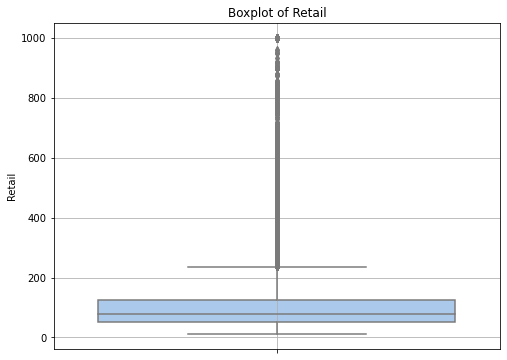

In [127]:
plot_boxplot(products_df, "Retail")

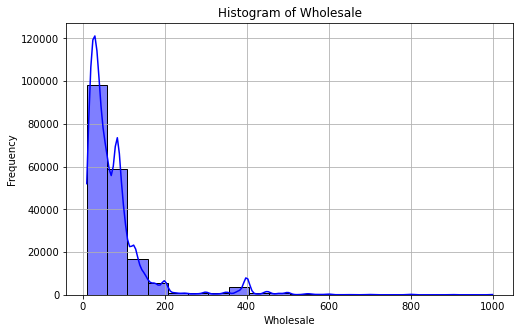

In [128]:
plot_histogram(products_df, "Wholesale")

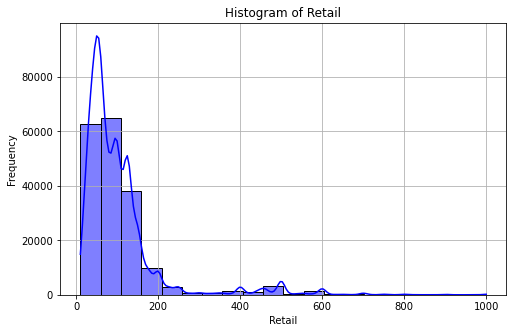

In [129]:
plot_histogram(products_df, "Retail")

Apart from bananas, both cooked and ripening, all commodity null values have been imputed with the commodity median. However Bananas, both cooked and ripened still have null values because they lack any values in them for the Retail column. 

In [130]:
# Finding the number of null values in the wholesale and retail columns of our data
null_counts = products_df.apply(lambda x: x.isnull().sum())

print(null_counts)

level_0           0
index             0
Commodity         0
Classification    0
Market            0
Wholesale         0
Retail            0
Supply Volume     0
County            0
Date              0
latitude          0
longitude         0
Category          0
Unit              0
dtype: int64


Next step is to drop all observations of Banana (Cooking) and Banana (Ripening) since there is no way for us to fill those values for these commodities.

In [131]:
# drop records of Banana (Cooking)', 'Banana (Ripening) commodities
products_df.drop(products_df[products_df['Commodity'].isin(['Banana (Cooking)', 'Banana (Ripening)'])].index, inplace=True)

In [132]:
# Finding the number of null values in the wholesale and retail columns of our data
null_counts = products_df.apply(lambda x: x.isnull().sum())

print(null_counts)

level_0           0
index             0
Commodity         0
Classification    0
Market            0
Wholesale         0
Retail            0
Supply Volume     0
County            0
Date              0
latitude          0
longitude         0
Category          0
Unit              0
dtype: int64


This confirms that the Retail column now has no more missing values.

In [133]:
# confirm the number of remaining records
products_df.shape

(187813, 14)

In [134]:
# products_df.to_csv("products.csv", index=False)

The dataset now has 195,172 records which is a good number of observations.

**Univariate Analysis**

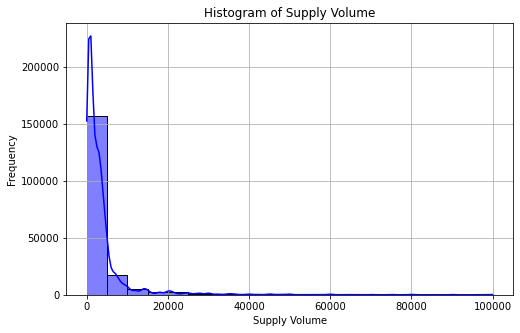

In [135]:
# Plotting histogram of supply volume to check for outliers
from scripts.visualization import plot_histogram

plot_histogram(products_df, 'Supply Volume')


Analysis of the Supply Volume column shows that it is not normally distributed. It is skewed to the left. The histogram's positive skewness indicates that most commodities have low supply volumes, with only a few having high volumes. This distribution suggests that high supply volumes might indicate high-demand commodities, while low volumes could point to niche or specialized products. Consequently, high-volume commodities may experience stable prices, whereas low-volume commodities might have higher or more volatile prices.

Let's look at the distribution of Dates in our dataset.

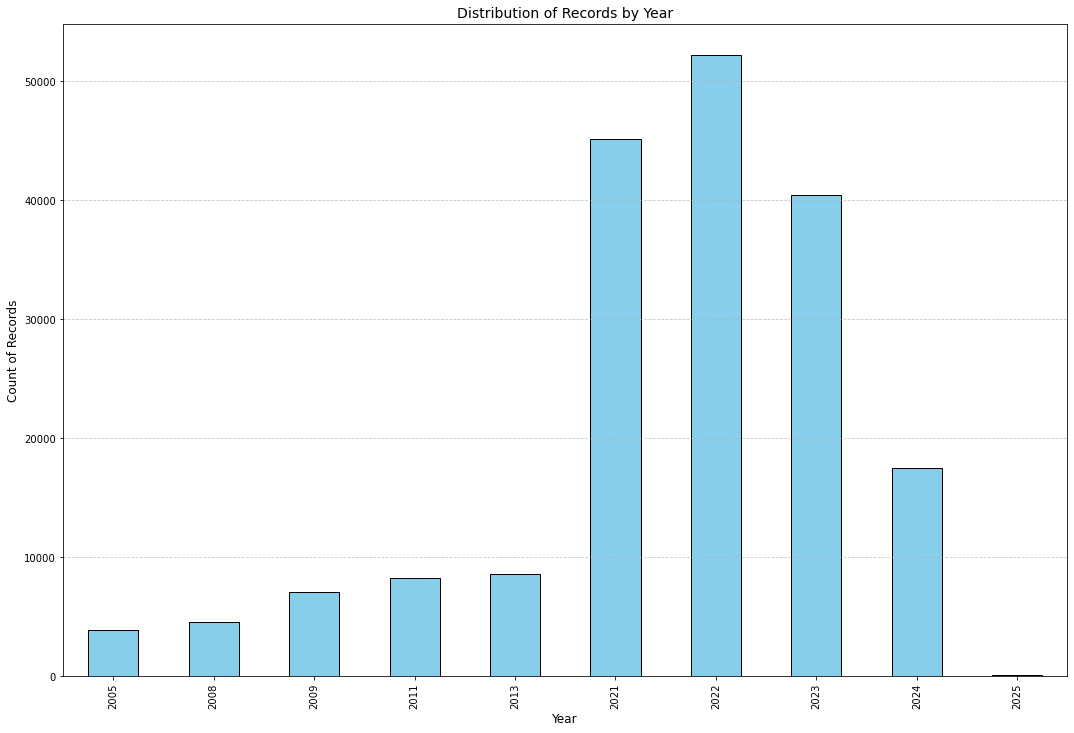

In [136]:
# Extract month-year period from the Date column
df = products_df.copy()
df['YearMonth'] = products_df['Date'].dt.to_period('Y')

# Count the number of records for each month-year
month_year_counts = df['YearMonth'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(18, 12))
month_year_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Records by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count of Records", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The bulk of the data collected is post-Covid from 2021 to as recently as 2025. This makes it very relevant for this study and generating modern day actionable insights.

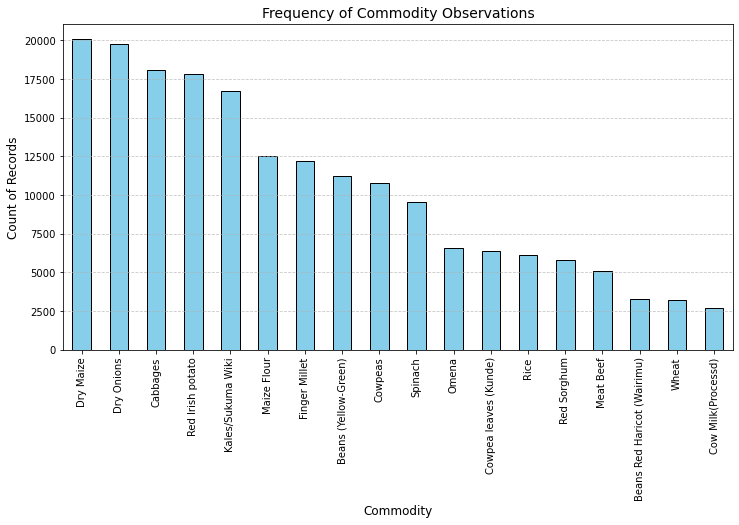

In [137]:
import matplotlib.pyplot as plt

#Bar Chart of Commodity Counts
commodity_counts = products_df['Commodity'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12,6))

commodity_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Frequency of Commodity Observations", fontsize=14)
plt.xlabel("Commodity", fontsize=12)
plt.ylabel("Count of Records", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Cabbages are are the most populous commodity in the dataset closely followed Dry maize and Dry Onions each with over 20,000 records. This might suggest they are either more frequently traded or consumed as these are major staple foods across many houselholds in Kenya. Processed Cow Milk, Wheat and Bean Red Haricot(Wairimu) variety are the least populous with all having just slightly over 2500 records.  This could suggest factors like lower production, less widespread consumption, or less frequent recording in the data.

**Bivariate Analysis**

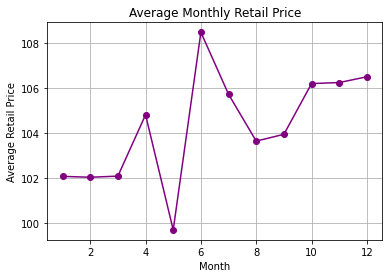

In [138]:
# Seasonal Trends
products_df['Month'] = products_df['Date'].dt.month
monthly_trends = products_df.groupby('Month')['Retail'].mean()
monthly_trends.plot(kind='line', marker='o', color='purple')
plt.title("Average Monthly Retail Price")
plt.xlabel("Month")
plt.ylabel("Average Retail Price")
plt.grid(True)
plt.show()

Prices typically drop during harvest seasons (when supply is high) and rise in lean periods (when stocks run low).

August sees price declines due to these regional harvests.

In September, food prices often rise as post-harvest supplies dwindle while demand remains steady.

In September, food prices are influenced by several factors:

Supply-Demand Shifts: As the harvest ends, supply declines while demand remains steady, pushing prices up.

Inflation Trends: The [September 2024 Consumer Price Index](https://www.knbs.or.ke/reports/consumer-price-indices-and-inflation-rates-september-2024/) reported a 3.6% year-on-year increase of retail prices, with mixed price movements across different commodities.
Overall, September marks a transition period where declining harvest stocks and market dynamics combine to influence higher food prices.

November and December also see increased retail prices due to the Holiday season.


Top 20 Markets by Total Supply Volume:
 Market
Eldoret Main            40954094.00
Kongowea                34886738.00
Bondo                   34232861.00
Kutus                   26170585.21
Nairobi Supermarkets    25335360.00
Daraja Mbili            23055873.00
Aram                    21752097.37
Kagio                   20909894.00
Kibuye                  19001905.00
Kakuma Modern Market    14881950.00
Diani Market            13753391.60
Chuka                   12088312.00
Ngong market            11636794.00
Akala                   11417232.00
Keroka                  11392368.55
Kapkwen                  9905494.00
Rongo                    9899587.97
Marindi                  9882336.28
Embu Town                9879445.70
Chwele                   9673095.00
Name: Supply Volume, dtype: float64


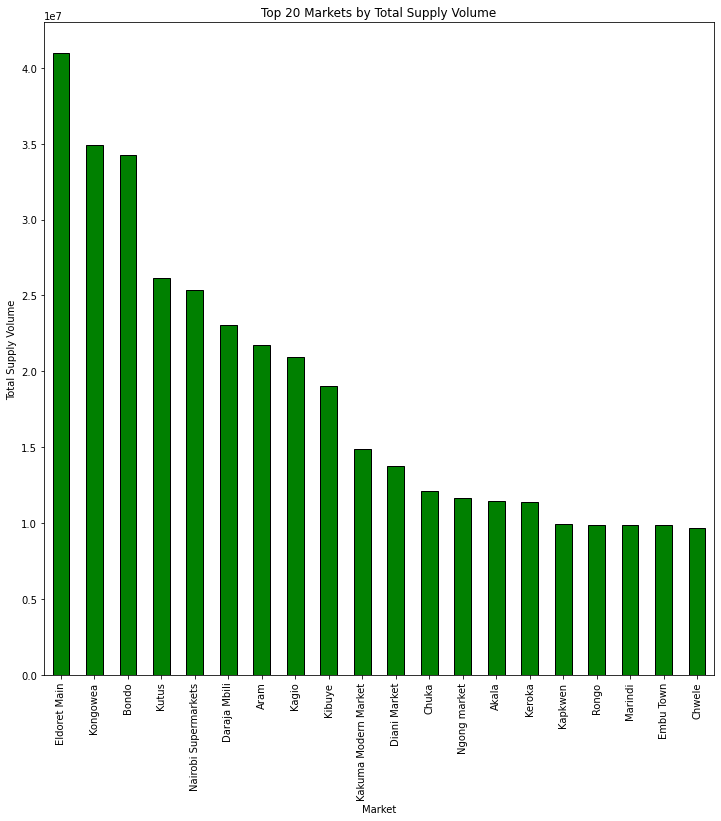

In [139]:
# Plotting top 20 markets by total supply volume
top_markets_by_supply = products_df.groupby('Market')['Supply Volume'].sum().nlargest(20)
print("\nTop 20 Markets by Total Supply Volume:\n", top_markets_by_supply)
top_markets_by_supply.plot(kind='bar', color='green', edgecolor='black', figsize=(12, 12))
plt.title("Top 20 Markets by Total Supply Volume")
plt.xlabel("Market")
plt.ylabel("Total Supply Volume")
plt.show()

This graph depicts the top 20 Kenyan markets by total supply volume. Eldoret Main Market significantly surpasses all others, indicating its dominance as a major distribution hub.  A wide range of supply volumes exists among the remaining top 20, reflecting varying market sizes and demand. The graph suggests a concentration of supply within these key markets.
Geographic distribution of these markets (e.g., Bondo, Kutus, Keroka) can allow for potential regional economic analysis when combined with location data.

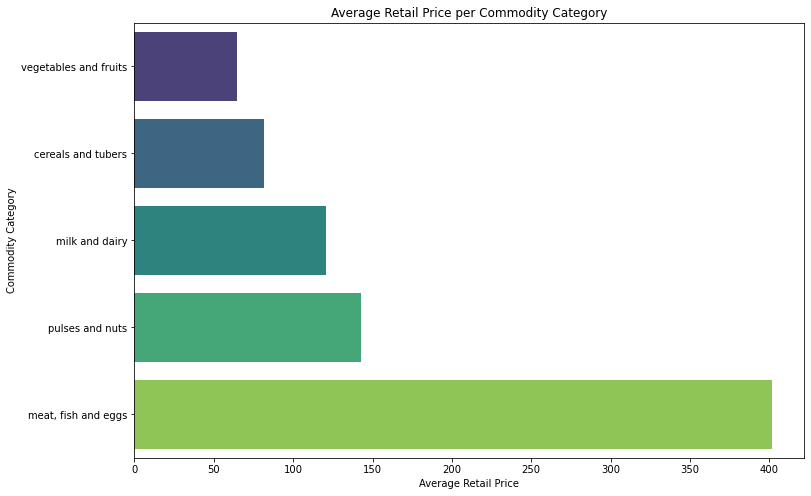

In [140]:
# Calculate the average retail price per category
category_avg_price = products_df.groupby('Category')['Retail'].mean().sort_values()

# Plot the average retail price per category
plt.figure(figsize=(12, 8))
sns.barplot(x=category_avg_price.values, y=category_avg_price.index, palette='viridis')
plt.title('Average Retail Price per Commodity Category')
plt.xlabel('Average Retail Price')
plt.ylabel('Commodity Category')
plt.show()

The bar graph represents the Average price details per category of the commodities. Categories like meat, fish and eggs are generally expensive considering they have the highest average retail price. Staples like maize, beans, or vegetables tend to be more affordable. The categories appear to have a gradual increase in price, with a clear disparity between the highest and lowest-priced commodities. The pricing difference could be influenced by supply chain costs, seasonal availability or import dependencies.

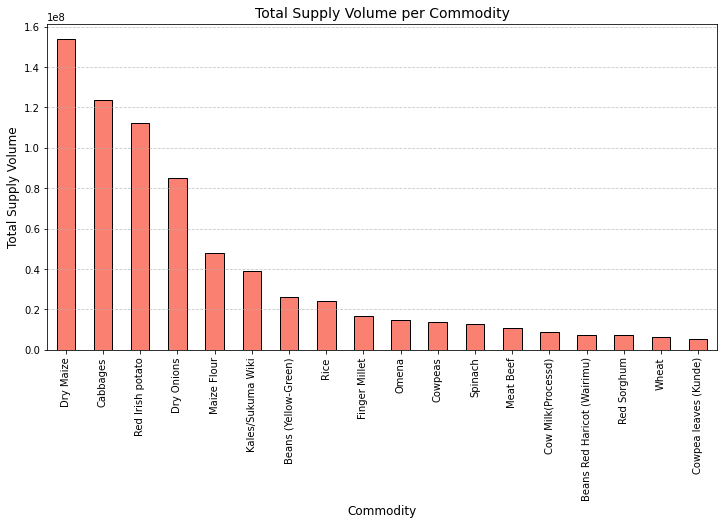

In [141]:
# Bar Chart of Total Supply Volume per Commodity
commodity_supply = products_df.groupby('Commodity')['Supply Volume'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
commodity_supply.plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Total Supply Volume per Commodity", fontsize=14)
plt.xlabel("Commodity", fontsize=12)
plt.ylabel("Total Supply Volume", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The graph depicts the total supply volume of various agricultural commodities. It highlights the varying levels of **production and availability** for different agricultural products, with Dry Maize clearly dominating the supply, followed by Cabbages and Red Irish Potatoes. Commodities such as Kales/Sukuma Wiki, Beans (Yellow-Green), Rice, Finger Millet, and Omena, among others, have notably lower supply volumes. This disparity in supply volume likely has implications for market prices, food security, and agricultural planning within the region represented.

**Multivariate Analysis**

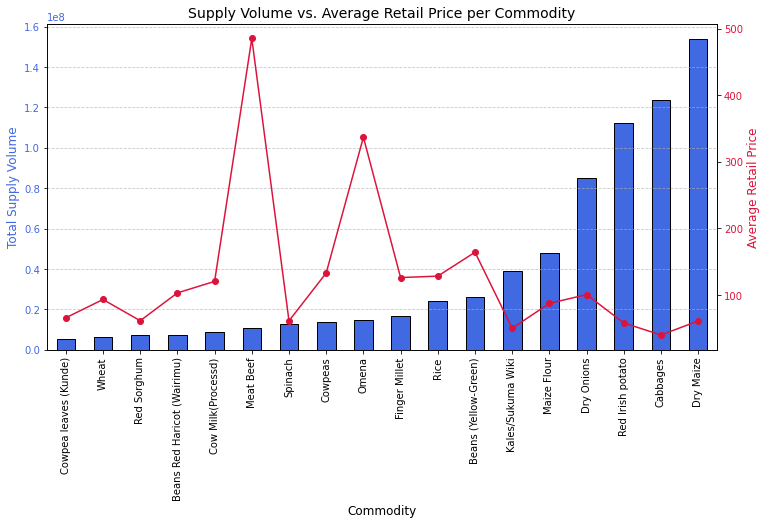

In [142]:
# Aggregate supply volume and average retail price per commodity
commodity_stats = products_df.groupby('Commodity').agg({'Supply Volume': 'sum', 'Retail': 'mean'}).sort_values('Supply Volume')

# Plot supply volume as bars and retail price as a line
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for supply volume
commodity_stats['Supply Volume'].plot(kind='bar', color='royalblue', edgecolor='black', ax=ax1)
ax1.set_ylabel("Total Supply Volume", fontsize=12, color='royalblue')
ax1.set_xlabel("Commodity", fontsize=12)
ax1.tick_params(axis='y', labelcolor='royalblue')
ax1.set_xticklabels(commodity_stats.index, rotation=90)

# Line plot for average retail price
ax2 = ax1.twinx()
commodity_stats['Retail'].plot(kind='line', color='crimson', marker='o', ax=ax2)
ax2.set_ylabel("Average Retail Price", fontsize=12, color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

# Titles and grid
plt.title("Supply Volume vs. Average Retail Price per Commodity", fontsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

The graph shows an inverse relationship between supply volume and retail price. When supply is low, prices spike sharply, as seen in two major peaks. This likely means there were shortages at those points, driving prices higher. But as supply increases, prices start to stabilize and even decline. The pattern suggests that when more of a product is available, the market naturally corrects itself, making things more affordable. It’s a classic case of how availability influences cost.

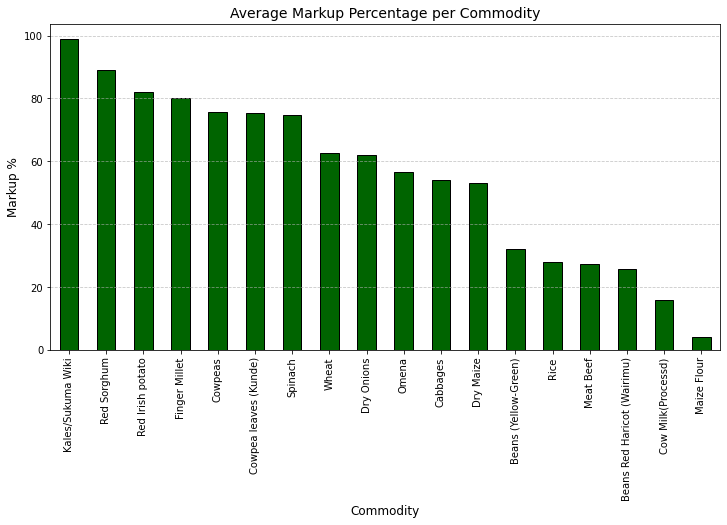

In [143]:
# Calculate the markup percentage
products_df['Markup %'] = ((products_df['Retail'] - products_df['Wholesale']) / products_df['Wholesale']) * 100

# Aggregate average markup percentage per commodity
commodity_markup = products_df.groupby('Commodity')['Markup %'].mean().sort_values(ascending=False)

# Plot markup percentage
plt.figure(figsize=(12, 6))
commodity_markup.plot(kind='bar', color='darkgreen', edgecolor='black')

plt.title("Average Markup Percentage per Commodity", fontsize=14)
plt.xlabel("Commodity", fontsize=12)
plt.ylabel("Markup %", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [144]:
products_df.describe()

,level_0,index,Wholesale,Retail,Supply Volume,latitude,longitude,Month,Markup %
count,187813.000000,187813.000000,187813.000000,187813.000000,187813.000000,187813.000000,187813.000000,187813.000000,187813.000000
mean,98500.724231,146603.453009,76.828506,103.920248,3813.740631,-0.698272,36.254425,6.371423,60.176293
std,56079.788967,81707.657152,84.038759,102.422241,7619.652179,1.431905,1.796023,3.162953,110.989449
min,0.000000,0.000000,10.000000,10.000000,0.000000,-4.622956,34.138607,1.000000,-97.357143
25%,50575.000000,78379.000000,30.000000,50.000000,720.000000,-1.166037,34.763182,4.000000,14.407749
50%,98274.000000,148855.000000,54.000000,80.000000,2000.000000,-0.289173,35.834422,6.000000,33.333333
75%,147255.000000,215168.000000,88.890000,125.000000,3600.000000,0.129513,37.250000,9.000000,66.700000
max,195171.000000,288477.000000,1000.000000,1000.000000,100000.000000,3.709823,55.454533,12.000000,5733.333333


In [145]:
high_markup_df = products_df[products_df['Markup %'] >1500]
high_markup_df

,level_0,index,Commodity,Classification,Market,Wholesale,Retail,Supply Volume,County,Date,latitude,longitude,Category,Unit,Month,Markup %
6440,6654,9337,Cabbages,-,Keroka,24.00,1000.00,7000.0,Nyamira,2024-04-25,-0.778200,34.947215,vegetables and fruits,/Kg,4,4066.666667
13796,14585,20222,Cabbages,-,Kabati Kitui,10.00,170.00,15000.0,Kitui,2022-08-18,-1.306356,38.332792,vegetables and fruits,/Kg,8,1600.000000
13846,14639,20301,Cabbages,-,Kabati Kitui,10.00,170.00,15000.0,Kitui,2022-08-15,-1.306356,38.332792,vegetables and fruits,/Kg,8,1600.000000
24221,27551,45385,Cowpea leaves (Kunde),-,Kilingili,38.00,833.33,400.0,Vihiga,2023-08-30,0.123337,34.681235,vegetables and fruits,/Kg,8,2092.973684
25246,28586,46706,Cowpea leaves (Kunde),-,Kabati Kitui,33.33,820.00,63.0,Kitui,2023-03-09,-1.306356,38.332792,vegetables and fruits,/Kg,3,2360.246025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178335,185572,275094,Beans (Yellow-Green),-,Chuka,15.56,250.00,720.0,Tharaka-Nithi,2023-10-17,-0.225222,37.423264,pulses and nuts,/Kg,10,1506.683805
178354,185591,275124,Beans (Yellow-Green),-,Chuka,15.56,250.00,720.0,Tharaka-Nithi,2023-10-13,-0.225222,37.423264,pulses and nuts,/Kg,10,1506.683805
179458,186701,276622,Beans (Yellow-Green),-,Chuka,15.56,250.00,360.0,Tharaka-Nithi,2023-06-13,-0.225222,37.423264,pulses and nuts,/Kg,6,1506.683805
179849,187095,277142,Beans (Yellow-Green),-,Chuka,15.56,250.00,270.0,Tharaka-Nithi,2023-05-12,-0.225222,37.423264,pulses and nuts,/Kg,5,1506.683805


In [146]:
products_df = products_df[(products_df['Markup %'] >-50) & (products_df['Markup %'] <1500)]
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186608 entries, 0 to 187812
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   level_0         186608 non-null  int64         
 1   index           186608 non-null  int64         
 2   Commodity       186608 non-null  object        
 3   Classification  186608 non-null  object        
 4   Market          186608 non-null  object        
 5   Wholesale       186608 non-null  float64       
 6   Retail          186608 non-null  float64       
 7   Supply Volume   186608 non-null  float64       
 8   County          186608 non-null  object        
 9   Date            186608 non-null  datetime64[ns]
 10  latitude        186608 non-null  float64       
 11  longitude       186608 non-null  float64       
 12  Category        186608 non-null  object        
 13  Unit            186608 non-null  object        
 14  Month           186608 non-null  int

In [147]:
products_df.describe()

,level_0,index,Wholesale,Retail,Supply Volume,latitude,longitude,Month,Markup %
count,186608.000000,186608.000000,186608.000000,186608.000000,186608.000000,186608.000000,186608.000000,186608.000000,186608.000000
mean,98533.185126,146656.073084,76.206850,103.977935,3816.253661,-0.699434,36.256199,6.371715,59.445680
std,56053.089973,81663.132241,81.789457,101.854785,7621.906773,1.433078,1.797074,3.163382,92.745285
min,0.000000,0.000000,10.000000,10.000000,0.000000,-4.622956,34.138607,1.000000,-49.909998
25%,50665.750000,78491.750000,30.000000,50.000000,720.000000,-1.166037,34.763182,4.000000,15.000000
50%,98183.500000,148753.500000,53.850000,80.000000,2000.000000,-0.289173,35.834422,6.000000,33.333333
75%,147320.250000,215251.250000,88.000000,125.000000,3600.000000,0.129513,37.250000,9.000000,67.138082
max,195171.000000,288477.000000,1000.000000,1000.000000,100000.000000,3.709823,55.454533,12.000000,1496.416667


In [148]:
from scipy.stats import skew

# Select relevant numerical columns
numerical_cols = ["Wholesale", "Retail", "Supply Volume", "Markup %"]

# Compute skewness
skewness_values = products_df[numerical_cols].skew()

# Display skewness
print(skewness_values)


Wholesale        3.505898
Retail           3.417773
Supply Volume    6.223570
Markup %         5.135407
dtype: float64


In [149]:
import numpy as np

# Apply log transformation (log1p = log(1 + x) to handle zeros safely)
products_df["Wholesale_log"] = np.log1p(products_df["Wholesale"])
products_df["Retail_log"] = np.log1p(products_df["Retail"])
products_df["Supply_Volume_log"] = np.log1p(products_df["Supply Volume"])

# Handle negative values in Markup % (shift values before log)
products_df["Markup_log"] = np.log1p(products_df["Markup %"] - products_df["Markup %"].min() + 1)


In [150]:
# Select relevant numerical columns
log_numerical_cols = ["Wholesale_log", "Retail_log", "Supply_Volume_log", "Markup %"]

# Compute skewness
log_skewness_values = products_df[log_numerical_cols].skew()

# Display skewness
print(log_skewness_values)

Wholesale_log        0.347077
Retail_log           0.410768
Supply_Volume_log   -0.688479
Markup %             5.135407
dtype: float64


In [151]:
from scipy.stats import boxcox

products_df["Markup_boxcox"], lambda_val = boxcox(products_df["Markup %"] - products_df["Markup %"].min() + 1)  
print("Optimal Lambda:", lambda_val)  # Check the transformation parameter


Optimal Lambda: 0.028988820231333895


In [152]:
print(products_df["Markup_boxcox"].skew())


0.02127564242377992


Bars extending higher on the graph indicate a greater markup percentage for the corresponding commodity. A high markup suggests either a profitable market or potentially inflated prices which according to the graph Beans(Yellow-Green) variety, have a greater markup percentage compared to the rest of the commodities, while a low markup indicates a smaller difference between cost and selling price as seen in maize flour.

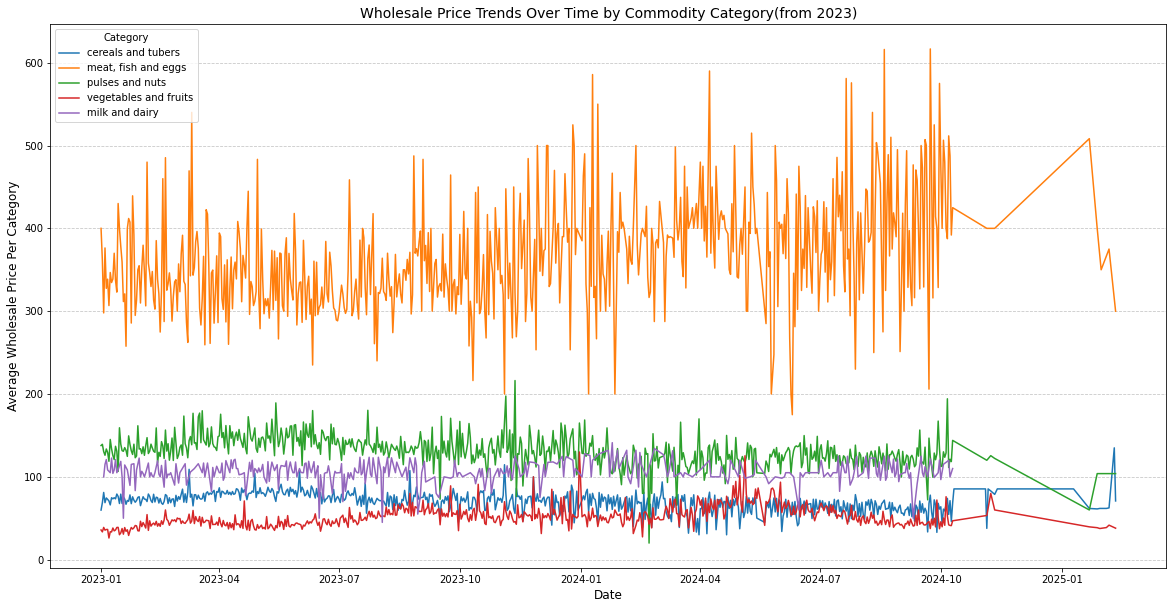

In [153]:
# Group data by category and date, then calculate the average wholesale price per category over time
df_category_trends = products_df.groupby(['Date', 'Category'])['Wholesale'].mean().reset_index()

# Filter data for records from 2023 onwards
df_category_trends = df_category_trends[df_category_trends['Date'].dt.year >= 2023]

# Plot price trends over time for different categories
plt.figure(figsize=(20, 10))
for category in df_category_trends['Category'].unique():
    subset = df_category_trends[df_category_trends['Category'] == category]
    plt.plot(subset['Date'], subset['Wholesale'], linestyle='-', label=category)

plt.title("Wholesale Price Trends Over Time by Commodity Category(from 2023)", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average Wholesale Price Per Category", fontsize=12)
plt.legend(title="Category",loc='upper left')  # Legend outside for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

This plot shows the price stability of different commodity categories for the past 2 years.

The "meat, fish, and eggs" category (orange line) consistently has the highest wholesale prices.
There are noticeable price spikes, suggesting seasonal effects, supply shortages, or market disruptions.

Categories like "cereals and tubers" (blue) and "pulses and nuts" (green) have relatively stable price trends over time, with minimal fluctuations.

"Milk and dairy" category(purple) exhibits occasional large spikes, possibly due to supply chain issues or sudden demand surges. 

Some categories experience extreme short-term price increases, e.g., "meat, fish, and eggs" around October 2023 and "milk and dairy" around mid-2024. From domain research, these spikes can be attributed to the following factors:

In October 2023, Kenya experienced a significant increase in egg prices. This surge was primarily due to escalating transportation and production costs and increased cost of poultry feed largely driven by rising fuel prices, as reported in this [article by Food Business Africa](https://www.foodbusinessafrica.com/egg-prices-on-the-rise-in-kenya-due-to-economic-challenges/?utm_source=chatgpt.com).

In mid-2024, the dairy industry faced rising operational costs, including higher expenses for animal feed, labor, fuel and government intervention to increase milk prices to ensure fair compensation for dairy farmers. These increased costs coupled with reduced local supply were passed on to consumers, resulting in higher retail prices for milk and dairy products as reported by [ForkAgro](https://forkagro.com/en/news/v/rost-operacionnoj-sebestoimosti-moloka-v-2024-godu-vyzvan-mnozhestvom-faktorov-privodya-k-vozmozhnomu-uvelicheniyu-cen-na-molochnuyu-produkciyu?utm_source=chatgpt.com).

The price spikes observed in these categories during the specified periods were influenced by a combination of increased production and transportation costs, supply chain disruptions, and government policy interventions aimed at stabilizing the respective sectors

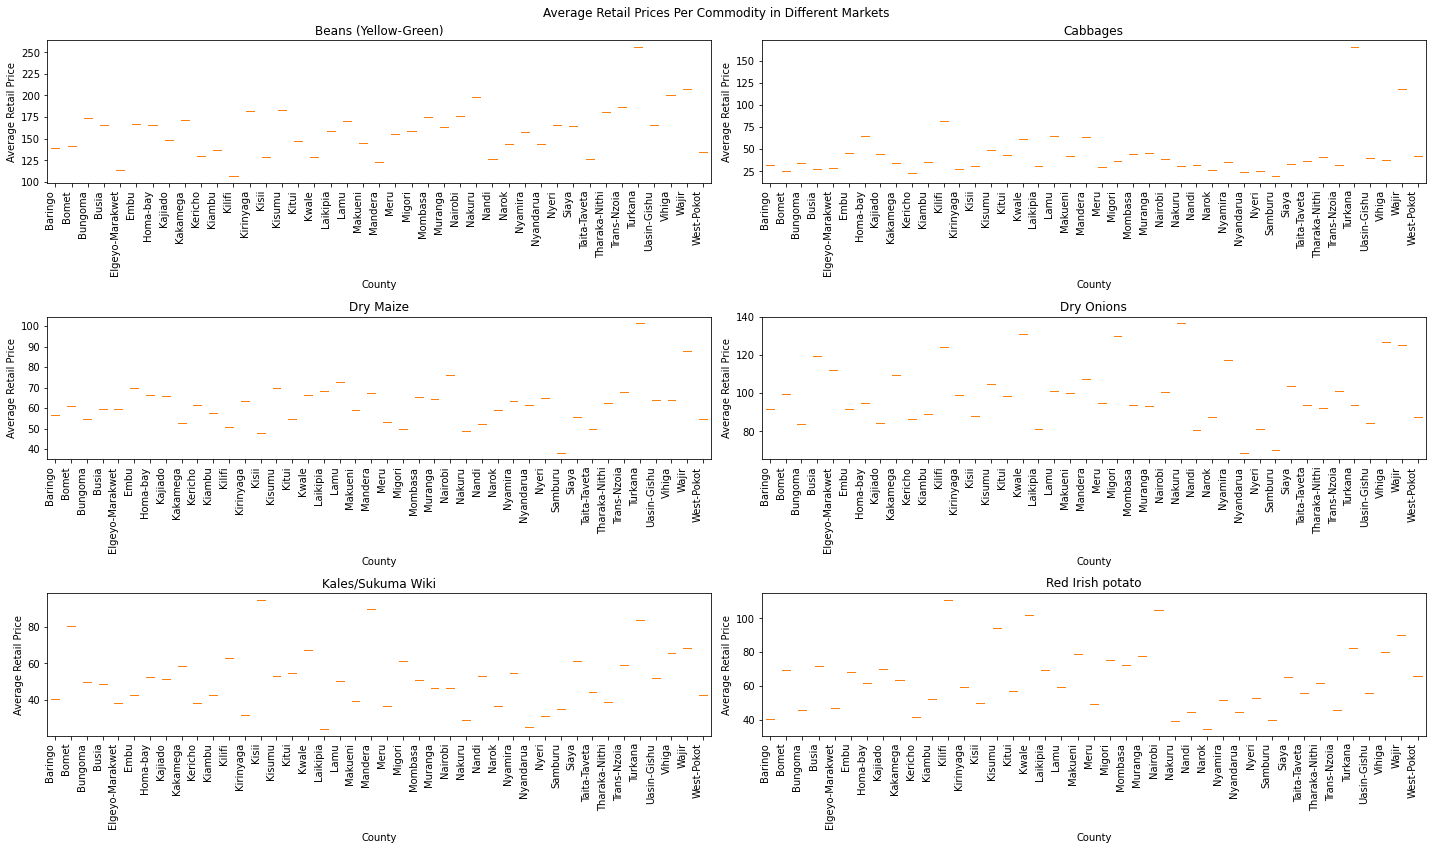

In [154]:
import matplotlib.pyplot as plt
import numpy as np

# Filter the data from 2015 onwards
df_filtered_2015 = products_df[products_df['Date'].dt.year >= 2015]

# Calculate average retail prices per commodity and market
df_avg = df_filtered_2015.groupby(['Commodity', 'County'], as_index=False)['Retail'].mean()

# Limit to top 6 most frequent commodities for better visualization
top_commodities = df_avg['Commodity'].value_counts().index[:6]
df_avg = df_avg[df_avg['Commodity'].isin(top_commodities)]

# Create a figure
plt.figure(figsize=(20, 12))  # Adjust the figure width for better spacing
plt.suptitle("Average Retail Prices Per Commodity in Different Markets")

# Get unique commodities for subplots
commodities = df_avg['Commodity'].unique()

# Number of subplots (one per commodity)
n_cols = 2  # Set the number of columns for subplot layout
n_rows = len(commodities) // n_cols + (1 if len(commodities) % n_cols != 0 else 0)

# Loop through the commodities to create each subplot
for i, commodity in enumerate(commodities):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    
    # Filter the data for the current commodity
    df_commodity = df_avg[df_avg['Commodity'] == commodity]
    
    # Create the boxplot for the commodity
    ax.boxplot([df_commodity[df_commodity['County'] == county]['Retail'] for county in df_commodity['County'].unique()])
    
    # Set the labels and title
    ax.set_xticklabels(df_commodity['County'].unique(), rotation=90, ha='right')
    ax.set_xlabel('County')
    ax.set_ylabel('Average Retail Price')
    ax.set_title(commodity)

# Adjust spacing for readability
plt.subplots_adjust(hspace=0.6, wspace=0.4)

# Show the plot
plt.tight_layout()
plt.show()


**Cabbages:** Turkana, West Pokot, and Marsabit have the highest cabbage prices. These counties are remote, arid/semi-arid, and distant from major agricultural centers, leading to high transportation costs and likely limited local production due to harsh environmental conditions.

**Dry Maize:** Turkana, Laikipia, and Lamu show high maize prices.  Turkana and Lamu face challenges similar to those mentioned for cabbages (remoteness, aridity), limiting local maize production. Laikipia, while not as remote as Turkana, may have limited suitable land for maize cultivation and also faces challenges with water availability, driving up prices due to reliance on external supply.

**Dry Onions:** Nakuru, Migori, and Busia have high onion prices. Onions are perishable and require proper storage.  These counties may lack adequate storage facilities, leading to losses and higher prices to compensate.  Additionally, transportation costs and local supply/demand dynamics could be contributing factors.

**Kales/Sukuma Wiki:** Bomet, Kisii, Meru, and Turkana have high prices.  While kales/sukuma wiki are often locally grown, these specific counties may have experienced lower than usual local production due to seasonal variations, pest infestations, or other localized agricultural challenges. Turkana's remoteness likely adds to the cost.

**Irish Potato:** Kilifi, Nairobi, Kisumu, and Kwale show high potato prices.  Potatoes, like onions, require proper storage, and these counties might face similar storage and transportation challenges. Nairobi, as a major urban center, likely has high demand, which could also contribute to higher prices.

**Beans:** Turkana and Marsabit have high bean prices. These remote and arid counties likely face significant challenges in producing enough beans locally, leading to reliance on supplies from other regions, which drives up prices due to transportation costs.

**Rice:** Uasin Gishu, Kirinyaga, and West Pokot have high rice prices.  While some of these counties might be known for rice production, they may be experiencing local shortages due to drought, reduced acreage under cultivation, or high demand relative to supply.  West Pokot's remote location likely adds to the cost.

In [155]:
# import pandas as pd
# import glob
# import os

# # Set the directory containing your CSV files
# tweets_csv_directory = ".\\scripts\\Twitter"  # Replace with the path to your directory

# # Use glob to match all CSV files in the directory
# tweet_csv_files = glob.glob(os.path.join(tweets_csv_directory, '*.csv'))

# # Define the expected column names (update these with your actual column names)
# column_names = ['column1', 'column2', 'column3', 'column4', "column5"]  # Replace with actual column names

# # Initialize an empty list to hold DataFrames
# tweets_data_frames = []

# # Iterate over the list of CSV files
# for file in tweet_csv_files:
#     # Read each CSV file into a DataFrame, explicitly passing column names
#     try:
#         tweet_df = pd.read_csv(file, header=None, names=column_names)  # Read without header and assign column names
#         tweets_data_frames.append(tweet_df)
#     except Exception as e:
#         print(f"Error reading {file}: {e}")

# # Concatenate all DataFrames in the list into a single DataFrame
# tweets_combined_df = pd.concat(tweets_data_frames, ignore_index=True)

# # Check the combined DataFrame for any unexpected columns
# print(tweets_combined_df.isna().value_counts())

# # Write the cleaned DataFrame to a CSV file
# # output_file = "combined_tweets.csv"
# # tweets_combined_df.to_csv(output_file, index=False)


In [156]:
# # DATA PROCESSING FOR MODELLING
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler, LabelEncoder
# from sklearn.model_selection import train_test_split

# # Load dataset
# df = pd.read_csv("products.csv")
# df['Date'] = pd.to_datetime(df['Date'])  # Convert Date column
# df = df.sort_values(by=['Date'])  # Sort by Date

# # **Filter records from 2021 onwards**
# df = df[df['Date'] >= '2021-01-01']

# # Feature and target selection
# feature_cols = ['Wholesale', 'Supply Volume', 'Markup %', 'Commodity', 'Market', 'Category']
# target_variable = 'Retail'  # Target variable

# # Encode categorical features
# label_encoders = {}
# for col in ['Commodity', 'Market', 'Category']:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     label_encoders[col] = le  # Store encoders for future use

# # **Scaling numerical features (excluding target for XGBoost)**
# scaler = MinMaxScaler()

# # Store unscaled 'Retail' for XGBoost
# df['Retail_unscaled'] = df['Retail'].copy()

# # Scale only the features + target for RNN models
# df[['Wholesale', 'Supply Volume', 'Markup %', 'Retail']] = scaler.fit_transform(
#     df[['Wholesale', 'Supply Volume', 'Markup %', 'Retail']]
# )

# # **Train-test split**
# X = df[feature_cols]
# y_scaled = df['Retail']  # Scaled target for RNN models
# y_unscaled = df['Retail_unscaled']  # Unscaled target for XGBoost

# X_train, X_test, y_train_scaled, y_test_scaled = train_test_split(X, y_scaled, test_size=0.2, random_state=42, shuffle=False)
# _, _, y_train_unscaled, y_test_unscaled = train_test_split(X, y_unscaled, test_size=0.2, random_state=42, shuffle=False)

# # **Save preprocessed data for both scripts**
# preprocessed_data = {
#     "X_train": X_train,
#     "X_test": X_test,
#     "y_train_scaled": y_train_scaled,
#     "y_test_scaled": y_test_scaled,
#     "y_train_unscaled": y_train_unscaled,  # Now properly stored
#     "y_test_unscaled": y_test_unscaled,
#     "scaler": scaler,
#     "feature_cols": feature_cols,  # Fixed typo here
#     "target_variable": target_variable
# }


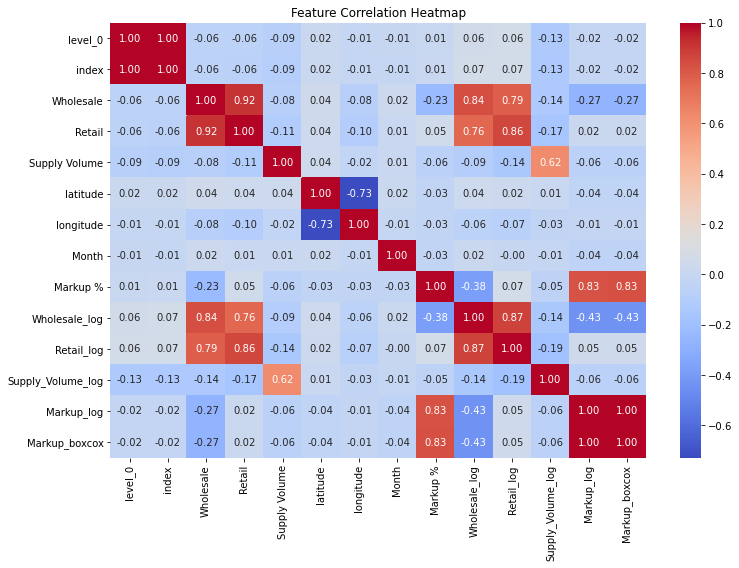

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = products_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Save to a CSV file
corr_matrix.to_csv("correlation_matrix.csv")

## MODELLING
***

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score

**BASELINE XGBoost MODEL**

In [ ]:
# Select features based on correlation analysis
features = ["Wholesale", "Supply Volume", "Wholesale_log", "Markup %"]
target = "Retail"  # Replace with your actual target column

# Split data into X (features) and y (target)
products_df = products_df[products_df["Date"].dt.year > 2020]

X = products_df[features]
y = products_df[target]

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
xgb_model = XGBRegressor(objective='reg:squarederror', 
                         n_estimators=100, 
                         learning_rate=0.1, 
                         max_depth=5, 
                         random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


MAE: 1.4217
RMSE: 3.2249
R² Score: 0.9992


**MODEL 1**

Tune more additional parameters.

In [160]:
xgb_model_2 = XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=50,  # Reduce tree count
    learning_rate=0.05,  # Smaller learning rate
    max_depth=3,  # Reduce depth
    subsample=0.8,  # Use 80% of data per tree
    colsample_bytree=0.8,  # Use 80% of features per tree
    random_state=42
)
xgb_model_2.fit(
    X_train, y_train, 
    eval_set=[(X_test, y_test)], 
    eval_metric="mae", 
    early_stopping_rounds=10,  # Stop if no improvement
    verbose=False)

# Predict
y_pred_2 = xgb_model_2.predict(X_test)

# Evaluate model
mae_2 = mean_absolute_error(y_test, y_pred_2)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred_2))
r2_2 = r2_score(y_test, y_pred_2)

print(f"MAE: {mae_2:.4f}")
print(f"RMSE: {rmse_2:.4f}")
print(f"R² Score: {r2_2:.4f}")

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = -cross_val_score(xgb_model_2, X, y, cv=kf, scoring='neg_mean_absolute_error')
rmse_scores = np.sqrt(-cross_val_score(xgb_model_2, X, y, cv=kf, scoring='neg_mean_squared_error'))
r2_scores = cross_val_score(xgb_model_2, X, y, cv=kf, scoring='r2')

print(f"Cross-Validation MAE: {mae_scores.mean():.4f} ± {mae_scores.std():.4f}")
print(f"Cross-Validation RMSE: {rmse_scores.mean():.4f} ± {rmse_scores.std():.4f}")
print(f"Cross-Validation R²: {r2_scores.mean():.4f} ± {r2_scores.std():.4f}")


MAE: 15.0619
RMSE: 27.3362
R² Score: 0.9398
Cross-Validation MAE: 14.9435 ± 0.2349
Cross-Validation RMSE: 26.0462 ± 0.8924
Cross-Validation R²: 0.9439 ± 0.0028


**MODEL 2**

Use different features

In [161]:
features_2 = ["Supply Volume", "Wholesale_log", "Markup %", "Markup_log"]

X_2 = products_df[features_2]

# Split data into training and testing sets (80-20 split)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, test_size=0.2, random_state=4)

xgb_model_3 = XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=200,  
    learning_rate=0.03,  
    max_depth=4,  # Increased from 3 to 4  
    subsample=0.8,  
    colsample_bytree=0.8,  
    reg_lambda=0.5,  # Slightly relaxed L2 regularization  
    reg_alpha=0.05,  # Slightly relaxed L1 regularization  
    random_state=42
)

xgb_model_3.fit(
    X_train_2, y_train_2, 
    eval_set=[(X_test_2, y_test_2)], 
    eval_metric="mae",  
    early_stopping_rounds=15,  
    verbose=False
)

# Predict
y_pred_3 = xgb_model_3.predict(X_test_2)

# Evaluate model
mae_3 = mean_absolute_error(y_test_2, y_pred_3)
rmse_3 = np.sqrt(mean_squared_error(y_test_2, y_pred_3))
r2_3 = r2_score(y_test_2, y_pred_3)

print(f"MAE: {mae_3:.4f}")
print(f"RMSE: {rmse_3:.4f}")
print(f"R² Score: {r2_3:.4f}")

# from sklearn.model_selection import TimeSeriesSplit
# tscv = TimeSeriesSplit(n_splits=5)

# mae_scores_3= -cross_val_score(xgb_model_3, X_2, y, cv=tscv, scoring='neg_mean_absolute_error')
# print(f"Time-Based CV MAE: {mae_scores.mean():.4f} ± {mae_scores.std():.4f}")

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores_3 = -cross_val_score(xgb_model_3, X_2, y, cv=kf, scoring='neg_mean_absolute_error')
rmse_scores_3 = np.sqrt(-cross_val_score(xgb_model_3, X_2, y, cv=kf, scoring='neg_mean_squared_error'))
r2_scores_3 = cross_val_score(xgb_model_3, X_2, y, cv=kf, scoring='r2')

print(f"Cross-Validation MAE: {mae_scores_3.mean():.4f} ± {mae_scores_3.std():.4f}")
print(f"Cross-Validation RMSE: {rmse_scores_3.mean():.4f} ± {rmse_scores_3.std():.4f}")
print(f"Cross-Validation R²: {r2_scores_3.mean():.4f} ± {r2_scores_3.std():.4f}")

MAE: 3.6608
RMSE: 6.4880
R² Score: 0.9965
Cross-Validation MAE: 3.4882 ± 0.1746
Cross-Validation RMSE: 6.6365 ± 0.5004
Cross-Validation R²: 0.9963 ± 0.0005


In [162]:
# Split data: Train on records before 2021, Test on 2021 & beyond
train_df = products_df[products_df["Date"].dt.year <= 2022]
test_df = products_df[products_df["Date"].dt.year > 2022]

# Select features and target
X_train_new = train_df[features_2]
y_train_new = train_df["Retail"]  

X_test_new = test_df[features_2]
y_test_new = test_df["Retail"]

# Check split sizes
print(f"Training Data: {X_train_new.shape}, Testing Data: {X_test_new.shape}")

# Initialize XGBoost model
xgb_model_unseen = XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=200,  
    learning_rate=0.03,  
    max_depth=4,  
    subsample=0.8,  
    colsample_bytree=0.8,  
    reg_lambda=0.5,  
    reg_alpha=0.05,  
    random_state=42
)

# Train on past data only
xgb_model_unseen.fit(
    X_train_new, y_train_new,
    eval_set=[(X_test_new, y_test_new)],
    eval_metric="mae",
    early_stopping_rounds=15,
    verbose=False
)
# Predict on unseen data
y_pred_unseen = xgb_model_unseen.predict(X_test_new)

# Evaluate performance
mae_unseen = mean_absolute_error(y_test_new, y_pred_unseen)
rmse_unseen = np.sqrt(mean_squared_error(y_test_new, y_pred_unseen))
r2_unseen = r2_score(y_test_new, y_pred_unseen)

print(f"Unseen Data MAE: {mae_unseen:.4f}")
print(f"Unseen Data RMSE: {rmse_unseen:.4f}")
print(f"Unseen Data R² Score: {r2_unseen:.4f}")


Training Data: (96866, 4), Testing Data: (57376, 4)
Unseen Data MAE: 5.4542
Unseen Data RMSE: 11.3407
Unseen Data R² Score: 0.9916


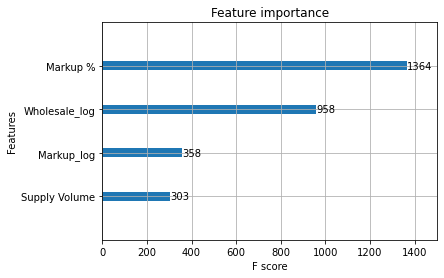

In [171]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(xgb_model_unseen, importance_type="weight")
plt.show()


In [163]:
# import matplotlib.pyplot as plt

# test_df["Predicted"] = y_pred_unseen

# plt.figure(figsize=(12, 6))
# plt.plot(test_df["Date"], test_df["Retail"], label="Actual", marker="o", linestyle="--")
# plt.plot(test_df["Date"], test_df["Predicted"], label="Predicted", marker="x", linestyle="-")
# plt.xlabel("Date")
# plt.ylabel("Retail Price")
# plt.legend()
# plt.title("Actual vs Predicted Prices Over Time")
# plt.show()


**MODEL 3**

Removed Markup 

In [173]:
features_3 = ["Supply Volume", "Wholesale_log", "Markup_log"]

X_3 = products_df[features_3]

# Split data into training and testing sets (80-20 split)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y, test_size=0.2, random_state=42)



xgb_model_4 = XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=200,  
    learning_rate=0.03,  
    max_depth=4,  # Increased from 3 to 4  
    subsample=0.8,  
    colsample_bytree=0.8,  
    reg_lambda=0.5,  # Slightly relaxed L2 regularization  
    reg_alpha=0.05,  # Slightly relaxed L1 regularization  
    random_state=42
)

xgb_model_4.fit(
    X_train_3, y_train_3, 
    eval_set=[(X_test_3, y_test_3)], 
    eval_metric="mae",  
    early_stopping_rounds=15,  
    verbose=False
)

# Predict
y_pred_4 = xgb_model_4.predict(X_test_3)

# Evaluate model
mae_4 = mean_absolute_error(y_test_3, y_pred_4)
rmse_4 = np.sqrt(mean_squared_error(y_test_3, y_pred_4))
r2_4 = r2_score(y_test_3, y_pred_4)

print(f"MAE: {mae_4:.4f}")
print(f"RMSE: {rmse_4:.4f}")
print(f"R² Score: {r2_4:.4f}")

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores_4 = -cross_val_score(xgb_model_4, X_3, y, cv=kf, scoring='neg_mean_absolute_error')
rmse_scores_4 = np.sqrt(-cross_val_score(xgb_model_4, X_3, y, cv=kf, scoring='neg_mean_squared_error'))
r2_scores_4 = cross_val_score(xgb_model_4, X_3, y, cv=kf, scoring='r2')

print(f"Cross-Validation MAE: {mae_scores_4.mean():.4f} ± {mae_scores_4.std():.4f}")
print(f"Cross-Validation RMSE: {rmse_scores_4.mean():.4f} ± {rmse_scores_4.std():.4f}")
print(f"Cross-Validation R²: {r2_scores_4.mean():.4f} ± {r2_scores_4.std():.4f}")

MAE: 5.4295
RMSE: 11.8725
R² Score: 0.9886
Cross-Validation MAE: 5.1939 ± 0.1743
Cross-Validation RMSE: 10.9253 ± 0.7468
Cross-Validation R²: 0.9901 ± 0.0012


In [175]:
# Split data: Train on records before 2021, Test on 2021 & beyond
train_df_2 = products_df[products_df["Date"].dt.year <= 2022]
test_df_2 = products_df[products_df["Date"].dt.year > 2022]

# Select features and target
X_train_new_2 = train_df_2[features_3]
y_train_new_2 = train_df_2["Retail"]  

X_test_new_2 = test_df_2[features_3]
y_test_new_2 = test_df_2["Retail"]

# Check split sizes
print(f"Training Data: {X_train_new_2.shape}, Testing Data: {X_test_new_2.shape}")

# Initialize XGBoost model
xgb_model_unseen_2 = XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=200,  
    learning_rate=0.03,  
    max_depth=4,  
    subsample=0.8,  
    colsample_bytree=0.8,  
    reg_lambda=0.5,  
    reg_alpha=0.05,  
    random_state=42
)

# Train on past data only
xgb_model_unseen_2.fit(
    X_train_new, y_train_new,
    eval_set=[(X_test_new, y_test_new)],
    eval_metric="mae",
    early_stopping_rounds=15,
    verbose=False
)
# Predict on unseen data
y_pred_unseen_2 = xgb_model_unseen_2.predict(X_test_new)

# Evaluate performance
mae_unseen_2 = mean_absolute_error(y_test_new_2, y_pred_unseen_2)
rmse_unseen_2 = np.sqrt(mean_squared_error(y_test_new_2, y_pred_unseen_2))
r2_unseen_2 = r2_score(y_test_new_2, y_pred_unseen_2)

print(f"Unseen Data MAE: {mae_unseen_2:.4f}")
print(f"Unseen Data RMSE: {rmse_unseen_2:.4f}")
print(f"Unseen Data R² Score: {r2_unseen_2:.4f}")


Training Data: (96866, 3), Testing Data: (57376, 3)
Unseen Data MAE: 7.9916
Unseen Data RMSE: 17.1553
Unseen Data R² Score: 0.9807


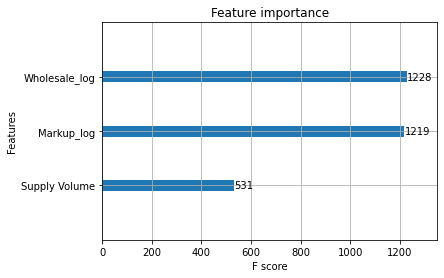

In [176]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(xgb_model_unseen_2, importance_type="weight")
plt.show()


**MODEL 4**

Interaction terms added

In [ ]:
# Define features, including interaction terms
products_df["Markup_Wholesale"] = products_df["Markup %"] * products_df["Wholesale_log"]
products_df["Markup_Supply"] = products_df["Markup %"] / (products_df["Supply Volume"] + 1e-6)  # Avoid division by zero

features_optimized = ["Wholesale_log", "Supply Volume", "Markup %", "Markup_log", "Markup_Wholesale", "Markup_Supply"]
X_optimized = products_df[features_optimized]

# Split data into training and testing sets (80-20 split)
X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(X_optimized, y, test_size=0.2, random_state=42)

# Initialize XGBoost Regressor with optimized hyperparameters
xgb_optimized = XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=150,  # Reduced to prevent overfitting
    learning_rate=0.02,  # Slower learning for better generalization
    max_depth=3,  # Shallower tree to avoid overfitting
    subsample=0.8,  
    colsample_bytree=0.8,  
    reg_lambda=2.0,  # Increased L2 regularization
    reg_alpha=0.05,  
    random_state=42
)

# Train the model
xgb_optimized.fit(
    X_train_opt, y_train_opt, 
    eval_set=[(X_test_opt, y_test_opt)], 
    eval_metric="mae",  
    early_stopping_rounds=15,  
    verbose=False
)

# Predict
y_pred_opt = xgb_optimized.predict(X_test_opt)

# Evaluate model
mae_opt = mean_absolute_error(y_test_opt, y_pred_opt)
rmse_opt = np.sqrt(mean_squared_error(y_test_opt, y_pred_opt))
r2_opt = r2_score(y_test_opt, y_pred_opt)

print(f"MAE: {mae_opt:.4f}")
print(f"RMSE: {rmse_opt:.4f}")
print(f"R² Score: {r2_opt:.4f}")

kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores_opt = -cross_val_score(xgb_optimized, X_optimized, y, cv=kf, scoring='neg_mean_absolute_error')
rmse_scores_opt = np.sqrt(-cross_val_score(xgb_optimized, X_optimized, y, cv=kf, scoring='neg_mean_squared_error'))
r2_scores_opt = cross_val_score(xgb_optimized, X_optimized, y, cv=kf, scoring='r2')

print(f"Cross-Validation MAE: {mae_scores_opt.mean():.4f} ± {mae_scores_opt.std():.4f}")
print(f"Cross-Validation RMSE: {rmse_scores_opt.mean():.4f} ± {rmse_scores_opt.std():.4f}")
print(f"Cross-Validation R²: {r2_scores_opt.mean():.4f} ± {r2_scores_opt.std():.4f}")

MAE: 12.9906
RMSE: 24.4011
R² Score: 0.9521
Cross-Validation MAE: 13.6627 ± 0.5954
Cross-Validation RMSE: 24.2936 ± 0.9713
Cross-Validation R²: 0.9511 ± 0.0036


In [169]:
# #RNN MODELS(LSTM & GRU)

# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
# import numpy as np
# from sklearn.metrics import mean_absolute_error

# # Load preprocessed data from shared script
# train_df = preprocessed_data["train_df"]
# test_df = preprocessed_data["test_df"]
# scaler = preprocessed_data["scaler"]
# feature_cols = preprocessed_data["feature_cols"]
# target_variable = preprocessed_data["target_variable"]

# # Function to create sequences for LSTM & GRU
# def create_sequences(data, target_col, feature_cols, lookback):
#     """Creates sequences of time steps for RNN models."""
#     X, y = [], []
#     for i in range(len(data) - lookback):
#         X.append(data[feature_cols].iloc[i:i + lookback].values)  # Features over lookback period
#         y.append(data[target_col].iloc[i + lookback])  # Target at next step
#     return np.array(X), np.array(y)

# # Lookback windows
# lookback_windows = [7, 14, 30]
# rnn_data = {}

# # Prepare sequence data for different lookback periods
# for lookback in lookback_windows:
#     X_train, y_train = create_sequences(train_df, target_variable, feature_cols, lookback)
#     X_test, y_test = create_sequences(test_df, target_variable, feature_cols, lookback)
#     rnn_data[lookback] = (X_train, y_train, X_test, y_test)

# # Function to build LSTM/GRU models
# def build_rnn_model(model_type, lookback, feature_count):
#     """Builds and compiles an LSTM or GRU model."""
#     model = Sequential()
    
#     if model_type == "LSTM":
#         model.add(LSTM(64, return_sequences=True, input_shape=(lookback, feature_count)))
#         model.add(LSTM(32, return_sequences=False))
#     elif model_type == "GRU":
#         model.add(GRU(64, return_sequences=True, input_shape=(lookback, feature_count)))
#         model.add(GRU(32, return_sequences=False))
    
#     model.add(Dropout(0.2))  # Dropout to reduce overfitting
#     model.add(Dense(16, activation='relu'))
#     model.add(Dense(1))  # Single output node
    
#     model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # Compile model
#     return model

# # Train and evaluate LSTM & GRU models
# results = []  # Store MAE results

# for lookback in lookback_windows:
#     X_train, y_train, X_test, y_test = rnn_data[lookback]
    
#     # Train LSTM Model
#     lstm_model = build_rnn_model("LSTM", lookback, X_train.shape[2])
#     lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
#     lstm_pred = lstm_model.predict(X_test)

#     # Train GRU Model
#     gru_model = build_rnn_model("GRU", lookback, X_train.shape[2])
#     gru_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
#     gru_pred = gru_model.predict(X_test)

#     # Inverse transform actual and predicted values
#     y_test_inv = inverse_transform(y_test)
#     lstm_pred_inv = inverse_transform(lstm_pred)
#     gru_pred_inv = inverse_transform(gru_pred)

#     # Calculate MAE on the original scale
#     lstm_mae = mean_absolute_error(y_test_inv, lstm_pred_inv)
#     gru_mae = mean_absolute_error(y_test_inv, gru_pred_inv)

#     results.append((lookback, lstm_mae, gru_mae))
#     print(f"Lookback: {lookback} days - LSTM MAE: {lstm_mae:.2f}, GRU MAE: {gru_mae:.2f}")


In [170]:
# import pandas as pd
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
# from sklearn.preprocessing import MinMaxScaler, LabelEncoder
# from sklearn.model_selection import train_test_split
# import xgboost as xgb
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# # Load dataset
# df = pd.read_csv("products.csv")
# df['Date'] = pd.to_datetime(df['Date'])
# df = df.sort_values(by=['Date'])

# # Feature selection
# feature_cols = ['Wholesale', 'Supply Volume', 'Markup %','Commodity', 'Market', 'Category']
# target_variable = 'Retail'

# # Encoding categorical features
# label_encoders = {}
# for col in ['Commodity', 'Market', 'Category']:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     label_encoders[col] = le

# # Scaling numerical features
# scaler = MinMaxScaler()
# df[['Wholesale', 'Supply Volume', 'Markup %', 'Retail']] = scaler.fit_transform(
#     df[['Wholesale', 'Supply Volume', 'Markup %','Retail']]
# )

# # Splitting dataset
# train_size = 0.8
# train_index = int(len(df) * train_size)
# train_df = df.iloc[:train_index]
# test_df = df.iloc[train_index:]

# # Function to create sequences for RNNs
# def create_sequences(data, target_col, feature_cols, lookback):
#     X, y = [], []
#     for i in range(len(data) - lookback):
#         X.append(data[feature_cols].iloc[i:i + lookback].values)
#         y.append(data[target_col].iloc[i + lookback])
#     return np.array(X), np.array(y)

# # Define lookback windows
# lookback_windows = [7, 14, 30]
# rnn_data = {}

# for lookback in lookback_windows:
#     X_train, y_train = create_sequences(train_df, target_variable, feature_cols, lookback)
#     X_test, y_test = create_sequences(test_df, target_variable, feature_cols, lookback)
#     rnn_data[lookback] = (X_train, y_train, X_test, y_test)

# # Function to build RNN models
# def build_rnn_model(model_type, lookback, feature_count):
#     model = Sequential()
    
#     if model_type == "LSTM":
#         model.add(LSTM(64, return_sequences=True, input_shape=(lookback, feature_count)))
#         model.add(LSTM(32, return_sequences=False))
#     elif model_type == "GRU":
#         model.add(GRU(64, return_sequences=True, input_shape=(lookback, feature_count)))
#         model.add(GRU(32, return_sequences=False))
    
#     model.add(Dropout(0.2))
#     model.add(Dense(16, activation='relu'))
#     model.add(Dense(1))  # Output layer
    
#     model.compile(optimizer='adam', loss='mse', metrics=['mae'])
#     return model

# # Train and evaluate LSTM & GRU models
# for lookback in lookback_windows:
#     X_train, y_train, X_test, y_test = rnn_data[lookback]
    
#     # Train LSTM
#     lstm_model = build_rnn_model("LSTM", lookback, X_train.shape[2])
#     lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)
#     lstm_pred = lstm_model.predict(X_test)
    
#     # Train GRU
#     gru_model = build_rnn_model("GRU", lookback, X_train.shape[2])
#     gru_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)
#     gru_pred = gru_model.predict(X_test)
    
#     print(f"LSTM (Lookback {lookback}) - MAE: {mean_absolute_error(y_test, lstm_pred)}")
#     print(f"GRU (Lookback {lookback}) - MAE: {mean_absolute_error(y_test, gru_pred)}")

# # Prepare data for XGBoost
# X_train_xgb = train_df[feature_cols]
# y_train_xgb = train_df[target_variable]
# X_test_xgb = test_df[feature_cols]
# y_test_xgb = test_df[target_variable]

# # Train XGBoost model
# xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
# xgb_model.fit(X_train_xgb, y_train_xgb)

# # Predict with XGBoost
# xgb_pred = xgb_model.predict(X_test_xgb)

# # Evaluate models
# print(f"XGBoost - MAE: {mean_absolute_error(y_test_xgb, xgb_pred)}")
